Этот ноутбук посвящен изучению различных статистических распределений — как дискретных, так и непрерывных. Я смотрю, как они устроены, как ведут себя выборки разного размера, и как на них работает центральная предельная теорема (ЦПТ), считаю доверительные интервалы и другие базовые статистические штуки. 

По мере настроения и наличию времени буду добавлять новые расчеты, графики и, возможно, неожиданные статистические эксперименты..

## Импортируем библиотеки

In [2]:
import numpy as np
from scipy import stats 


import matplotlib.pyplot as plt
import seaborn as sns

## Дискретные случайные величины

Дискретной случайной величиной называют случайную величину, которая принимает **счетное** или **конечное** множество значений. 

Дискратные случайные величины отличаются наличием ненулевой вероятности принятия любого значения случайной величины.

В ходе обзора мы будем обращаться к **функции распределения (Cumulative Distribution Function, CDF)** и функции **вероятсности (Probability Mass Function, PMF)**

**Функция вероятности (PMF):**

Функция вероятности $ \ P_X(x) \ $ дискретной случайной величины $ \ X \ $ определяется как:

$$
P_X(x) = P(X = x)
$$

которая удовлетворяет слудующим свойствам:

$$
P_X(x) \geq 0 \quad \text{для всех} \quad x \in  X;
$$

$$
\sum_{x \in  X} P_X(x) = 1
$$

---

**Функция распределения (CDF):**

Функция распределения $ \ F_X(x) \ $ дискретной случайной величины $ \ X \ $ определяется как:

$$
F_X(x) = P(X \leq x) = \sum_{t \leq x} P_X(t)
$$


**Заключение**
- **PMF** дает вероятность каждого конкретного значения дискретной случайной величины;
- **CDF** дает вероятность целого отрезка, который меньше или равен определенному значению случайной величины. CDF возрастающая накопительная неотрицательная функция.

### Распределение Бернулли

Распределение Бернулли самое простое: случайная величина принимает только два значения - 0 и 1, где 1 - это успех, а 0 - неудача с вероятностями p и p-1 соответственно. У распределения один единственный параметр - вероятность успеха **p**.

Успехом называют любое интересующее событие из двух возможных в данном эксперименте:
- осуществил посетитель магазина покупку;
- оставил жалобу клиент в ресторане; 
- покрытие кредита должником в определенный срок;
- реализация страхового риска.



Случайную величину Бернулии можно опредять для экспериментов, которые имеют больше двух исходов. Для этого необходимо определить событие(подмножество исходов), которое будет считаться успехом, а все иные исходы будут относиться к событию "неуспех". Т.е. 1 и 0 - противоположные события.

**Харктеристики Bern**:

1. Матожидание: p
2. Дисперсия: $ \ p * (1-p) \ $ 


Распределение Бернулли используется в качестве фундамента для определения иных распределений о которых поговорим ниже.

### Биномиальное распределение

\\\ в конце показать как считается выглядит функция распределения тесно связанная с комбинаторикой

Биномиальное распределение представляет их себя серию повторяющихся испытаний Бернулли. Биномиальная случайная величина имеет уже два параметра: p - вероятность успеха и n - количество испытаний Бернулли. 

Таким образом, значения случайной величины - это количество успехов из n испытаний. 

**Характеристики Binom(n,p)**:
1. Матожидание: 
   $$
   E(X) = n \cdot p
   $$

2. Дисперсия: 
   $$
   \text{Var}(X) = n \cdot p \cdot (1 - p)
   $$
   
   
PMF биномиальной случайной величины $\ X \$:

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
$$

где:
- $ \ k = 0, 1, 2, \ldots, n \ $ (количество успешных испытаний),
- $ \ \binom{n}{k} = \frac{n!}{k!(n-k)!} \ $ биномиальный коэффициент, показывающий количество способов $ \ k \ $ достичь успешных исходов из $ \ n \ $ испытаний,
- $ \ p^k \ $ вероятность успеха в степени количества успехов,
- $ \ (1 - p)^{n - k} \ $ вероятность проигрыша в степени количества проигрышей из $ \ n \ $ испытаний.

Визуализируем функцию распределения (pmf) биномиального распределения с разными параметрами **p** и посмотрим, как меняется распределение. Будем постепенно увеличвать **p** в серии из 30 одинаковых испытаний

In [13]:
# значение вероятности успеха в испытании Бернулии
p = 0.1
# количество испытаний
n = 30
# генерируем от 30 натуральных чисел от 0 до 30 включительно, которые отражают количество успехов из n испытаний. Для каждого 
# из этих чисел посчитаем вероятность
x = np.arange(0, 31)
# задаем случайную величину и распределение - на выходе вектор значений вероятности для k испытний 
binominal_pmf = stats.binom.pmf(x, n, p)

Визуализируем

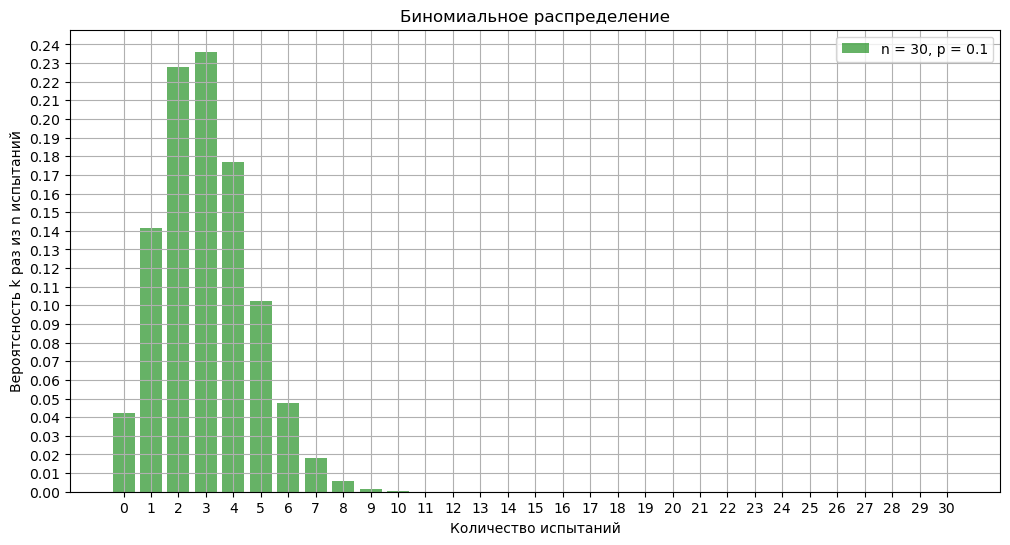

In [15]:
# размер графика
plt.figure(figsize=(12, 6))
# вид графика
plt.bar(x, binominal_pmf, color='green', alpha=0.6, label=f'n = {n}, p = {p}')
# настраиваем ось абсцисс 
plt.xticks(np.arange(0, 31, 1))  
# а теперь ординат
max_prob = max(binominal_pmf)  
plt.yticks(np.arange(0, max_prob + 0.01, 0.01))
# название абсциссы
plt.xlabel('Количество испытаний')
# а теперь ординаты
plt.ylabel('Вероятсность k раз из n испытаний')
# оглавление
plt.title('Биномиальное распределение')
# добавляем легенду
plt.legend()
# добавляем сетку
plt.grid(True)
plt.show()

In [16]:
print('Вероятность 0 успехов из 30 испытаний:', stats.binom.pmf(0, n, p))
print()
print('Вероятность 30 успехов из 30 испытаний:', stats.binom.pmf(30, n, p))

Вероятность 0 успехов из 30 испытаний: 0.042391158275216195

Вероятность 30 успехов из 30 испытаний: 1.0000000000000017e-30


Вероятность успеха мы задали невысокую - 10%, поэтому вероятность из **n** испытаний ни разу не реализоваться событию успеха выше, чем реализоваться толкьо успеху.

Самые вероятные исходы n испытний концентрируются в левой части: если мы будем проводить Bern испытание 30 раз с вероятностью успеха 0.1, то стоит ожидать до 9 успехов. Точную вероятность можно определить с помощью функции распределения, которая покажет вероятностью принятие случайный величины меньше или равное заданному значению

In [18]:
print('Вероятность до 9 успехов из 30 испытаний:', stats.binom.cdf(8, n, p))

Вероятность до 9 успехов из 30 испытаний: 0.9979801709947417


Посмотрим, что произойдет, если увеличить изменить параметр до p = 0.3

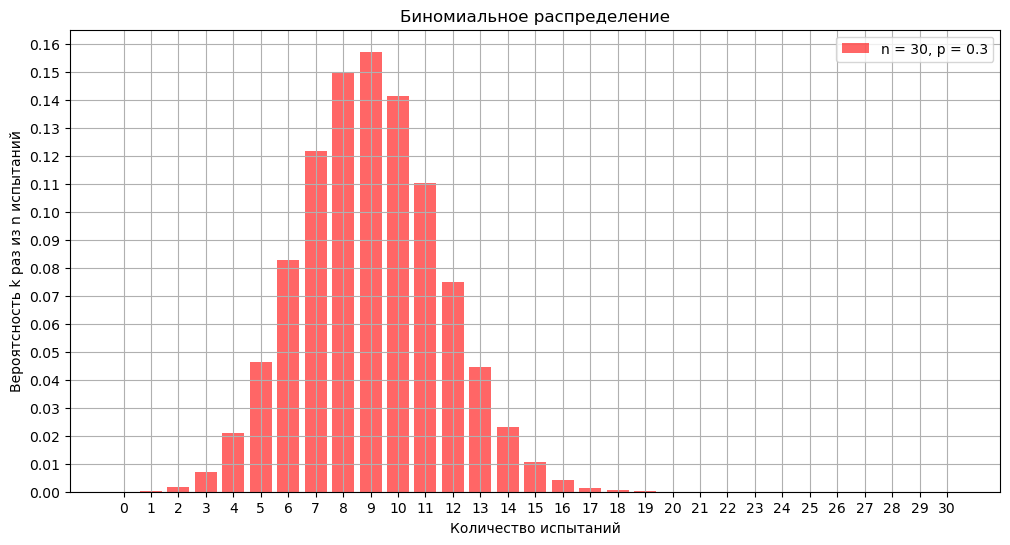

In [20]:
# значение вероятности успеха в испытании Бернулии
p = 0.3
# задаем случайную величину и распределение - на выходе вектор значений вероятности для k испытний 
binominal_pmf = stats.binom.pmf(x, n, p)

# размер графика
plt.figure(figsize=(12, 6))
# вид графика
plt.bar(x, binominal_pmf, color='red', alpha=0.6, label=f'n = {n}, p = {p}')
# настраиваем ось абсцисс 
plt.xticks(np.arange(0, 31, 1))  
# а теперь ординат
max_prob = max(binominal_pmf)  
plt.yticks(np.arange(0, max_prob + 0.01, 0.01))
# название абсциссы
plt.xlabel('Количество испытаний')
# а теперь ординаты
plt.ylabel('Вероятсность k раз из n испытаний')
# оглавление
plt.title('Биномиальное распределение')
# добавляем легенду
plt.legend()
# добавляем сетку
plt.grid(True)
plt.show()

Вероятность успеха по-прежнему меньше неуспеха. 

С увеличением параметра **p** распределение становится симмитричней, но на определенном отрезке, в нашем случае [2, 17]. Вероятность принятия случайной величиной значения, выходящего за пределы данного отрезка - очень мала.

Сравнительно с параметром p = 0.1 теперь у нас повысилась вероятность для большего количества **k** успешных испытаний, а наибольшая вероятность сместилась до k = 9. Однако, поскольку основная вероятность распределена между большим количеством k успехов, то вероятность самого вероятного значения случаной величины теперь существенно меньше вероятности самого веротяного значения для p=0.1 

In [22]:
print('Вероятность успеха от 3 до 17 из 30 испытаний:', stats.binom.cdf(17, n, 0.3) - stats.binom.cdf(2, n, 0.3) )

Вероятность успеха от 3 до 17 из 30 испытаний: 0.9972605977922208


In [23]:
print("Наибольшая вероятность при p=0.1 относится к значению k=3 и составляет:", stats.binom.pmf(3, 30, 0.1))
print()
print('Наибольшая вероятность при p=0.3 относится к значению k=9 и составляет:', stats.binom.pmf(9, 30, 0.3))

Наибольшая вероятность при p=0.1 относится к значению k=3 и составляет: 0.23608793223234253

Наибольшая вероятность при p=0.3 относится к значению k=9 и составляет: 0.15729077895777893


Получается, с увеличением вероятности успеха с 0.1 до 0.3 случайная величина стала более непредсказуемой: вероятность распределилась между большим количеством значений, а для самого ожидаемого значения вероятность снизилась с 0.24 до 0.16

Посмотрим, как будет выглядеть распределение при p = 0.5

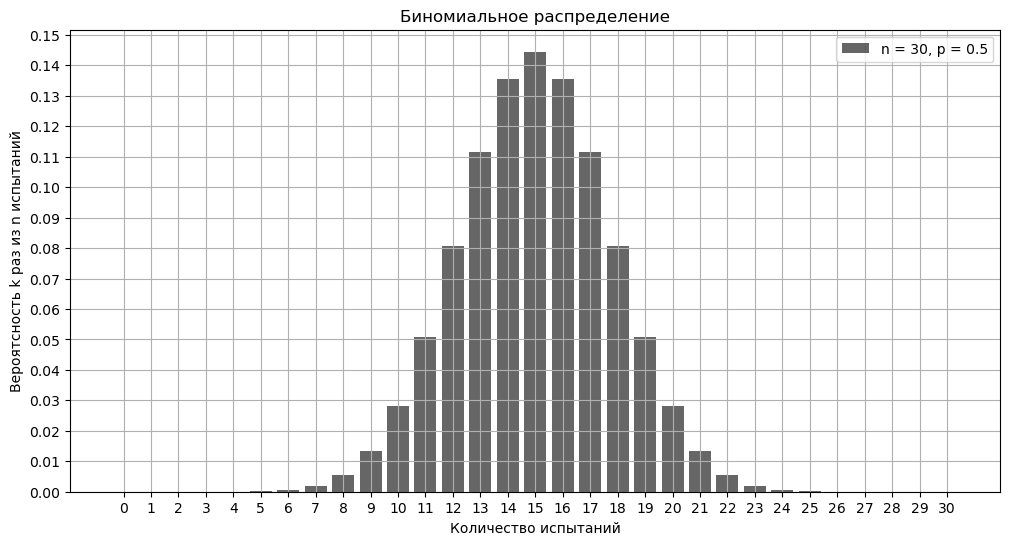

In [26]:
# значение вероятности успеха в испытании Бернулии
p = 0.5
# задаем случайную величину и распределение - на выходе вектор значений вероятности для k испытний 
binominal_pmf = stats.binom.pmf(x, n, p)

# размер графика
plt.figure(figsize=(12, 6))
# вид графика
plt.bar(x, binominal_pmf, color='black', alpha=0.6, label=f'n = {n}, p = {p}')
# настраиваем ось абсцисс 
plt.xticks(np.arange(0, 31, 1))  
# а теперь ординат
max_prob = max(binominal_pmf)  
plt.yticks(np.arange(0, max_prob + 0.01, 0.01))
# название абсциссы
plt.xlabel('Количество испытаний')
# а теперь ординаты
plt.ylabel('Вероятсность k раз из n испытаний')
# оглавление
plt.title('Биномиальное распределение')
# добавляем легенду
plt.legend()
# добавляем сетку
plt.grid(True)
plt.show()

Распределение стало симметричное: с обеих сторон от максимума распределения одинаковая скорость снижения значений вероятности. Максимум достигается посередине - в медиане значений случайной величины. Распределение походит на дискретную версию нормального, таким образом.

In [28]:
print('Вероятность успеха от 8 до 23 из 30 испытаний:', stats.binom.cdf(23, n, 0.5) -stats.binom.cdf(7, n, 0.5))

Вероятность успеха от 8 до 23 из 30 испытаний: 0.9966731071472168


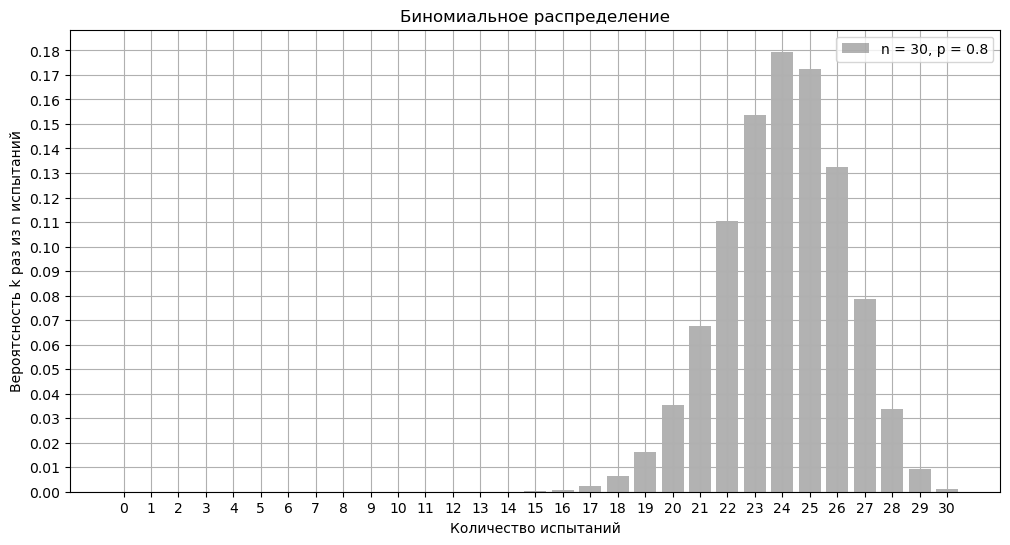

In [29]:
# значение вероятности успеха в испытании Бернулии
p = 0.8
# задаем случайную величину и распределение - на выходе вектор значений вероятности для k испытний 
binominal_pmf = stats.binom.pmf(x, n, p)

# размер графика
plt.figure(figsize=(12, 6))
# вид графика
plt.bar(x, binominal_pmf, color='gray', alpha=0.6, label=f'n = {n}, p = {p}')
# настраиваем ось абсцисс 
plt.xticks(np.arange(0, 31, 1))  
# а теперь ординат
max_prob = max(binominal_pmf)  
plt.yticks(np.arange(0, max_prob + 0.01, 0.01))
# название абсциссы
plt.xlabel('Количество испытаний')
# а теперь ординаты
plt.ylabel('Вероятсность k раз из n испытаний')
# оглавление
plt.title('Биномиальное распределение')
# добавляем легенду
plt.legend()
# добавляем сетку
plt.grid(True)
plt.show()

Если вероятность успеха превосходит вероястность неуспеха, то биномиальное распределение смещается в сторону больших значений k из n повторяющихся экспериментов. Само распределение приобретает ассиметрию с левым хвостом: вероятность получить большее значение k относительно пика больше, чем получить меньшее значение относительно пика. 

Если мы будет повторять 30 одинаковых испытаний с вероятностью успеха каждого 80%, то наиболее вероятно, что случайная величина примет значение 24.

In [31]:
print('Вероятность успеха от 18 до 30 из 30 испытаний:', stats.binom.cdf(30, n, 0.8) - stats.binom.cdf(17, n, 0.8))

Вероятность успеха от 18 до 30 из 30 испытаний: 0.9968889513680166


In [32]:
print("Наибольшая вероятность при p=0.8 относится к значению k=24 и составляет:", stats.binom.pmf(24, 30, 0.8))


Наибольшая вероятность при p=0.8 относится к значению k=24 и составляет: 0.17945748213541918


**Сделаем обобщающие выводы**

1. Вне зависимости от параметра **p** большая доля вероятности (выше 99%) концентрируется вокруг некоторого диапозона значений случайной величины. Этот диапозон тем меньше, чем дальше параметр **p** от 0.5 в правую или левую сторону. При смещении **p** в правую сторону от 0.5 отрезок смещается в сторону больших значений и наоборот:
- При p=0.1 и n=30 с вероятностью 0.997 случайная величина будет в отрезке натуральных чисел [0, 8], что соответствует 29% значений. 
- При p=0.3 и n=30 с вероятностью 0.997 случайная величина будет в отрезке натуральных чисел [3, 17], что соответствует 48% значений. 
- При p=0.5 и n=30 с вероятностью 0.997 случайная величина будет в отрезке натуральных чисел [8, 23], что соответствует 52% значений. 
- При p=0.8 и n=30 с вероятностью 0.997 случайная величина будет в отрезке натуральных чисел [18, 30], что соответствует 48% значений.


2. Изменение параметра **p** влияет на значение случайной величины, которое имеет наибольшую вероятность. Связь эта линейная: с увеличением p увеличивается и значение с максимальной вероятностью. 

3. При p = 0.5 максимальное значение функции вероятности достигается в медианном значении случайной величины. Само распределение имеет симметричную форму относительно максимума.

4. При p < 0.5 распределение имеет правый хвост, а при p > 0.5 левый хвост. Значит, при p != 0.5 большая часть маловероятных  значений случайной величины с обратной стороны смещения параметра p от 0.5 


**Применение Бернулли и Биномиального распределений**

Из любых экспериментов, которые мы можем описать событиями "успех" и "неуспех", мы можем смоделировать биномиальное распределение:

- Уличный опрос. Предложение ответить на вопросы социолога можно рассматривать как бернулливскую случайную величину, где p - это вероятность согласия. Тогда **n** предложений будет иметь биномиальное распределение с некоторым наиболее вероятным значением, которое будет соответствовать согласиям ответить на вопросы социолога.

- В статистики существует магическое число 30, которое по конвенции считается минимальным размером выборки на основании который мы можем начинать делать некоторые выводы о популяции при условии репрезентативности. Параметр **n** отличается тем, что мы можем на него влиять зачастую. Тогда, зная распределение Бернулли, мы могли бы подобрать такое значение n для которого будет значение 30 наиболее вероятным. Допустим, мы хотим узнать данные о доходах пользователей и, если мы знаем с какой вероятностью пользователь согласится ответить на вопрос о доходах, то мы можем понять, какое количество пользователей нам необходимо опросить.

- Конверсия в клиенты. Мы знаем вероятность совершения лидом покупки после почтовой рассылки. Тогда при организации email кампании, допустим в 1000 рассылок, мы можем рассчитать ожидаемую конверсию в клиенты.

- Удержание пользователей(Customer retention). Если бизнес основан на подписках и мы знаем вероятность продления пользователем подписки, то мы можем оценить удержание, рассматриваая каждого пользователя как идентичное испытание. Это поможет так же лучше понимать связанную метрику отскока - Churn Rate.

- Контроль качества и мониторинг. Мы можем использовать биномиальное распределение для определения порога в бизнес метриках, которые будут сигнализировать нам необходимость организовать проверку. Например, в e-commerce бизнесе вероятность возврата товара составляет 5%. В сутки осуществляется 100 покупок. Посмотрим на распределение:

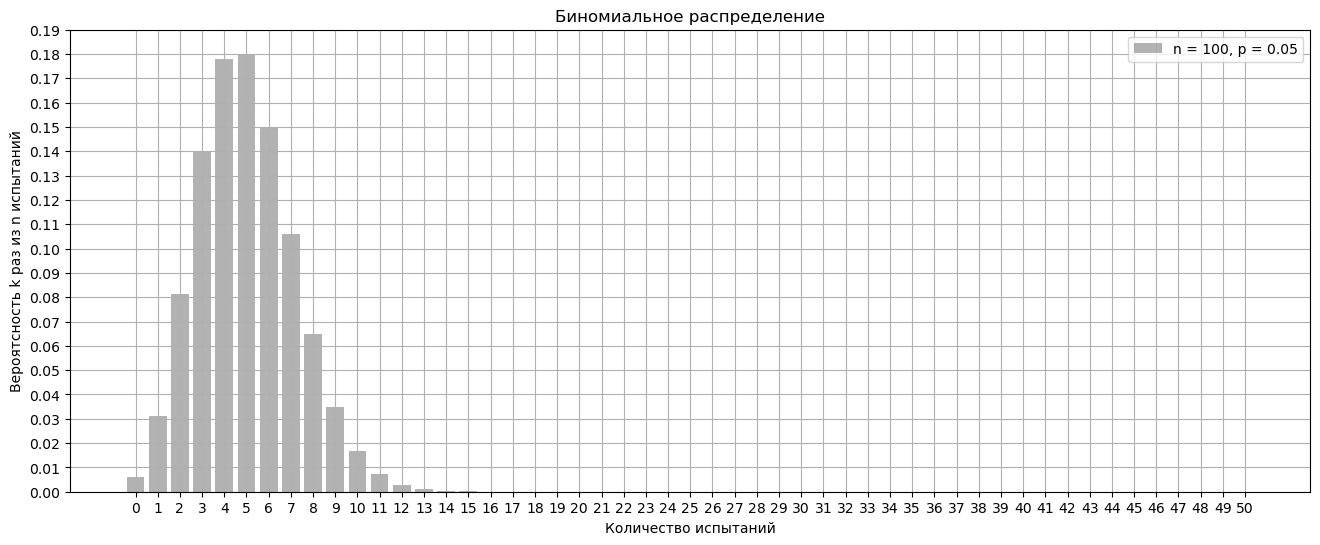

In [35]:
x = np.arange(0, 101)
n = 100
p = 0.05
binominal_pmf = stats.binom.pmf(x, n, p)

# размер графика
plt.figure(figsize=(16, 6))
# вид графика
plt.bar(x[:51], binominal_pmf[:51], color='gray', alpha=0.6, label=f'n = {n}, p = {p}')
# настраиваем ось абсцисс 
plt.xticks(np.arange(0, 51, 1))  
# а теперь ординат
max_prob = max(binominal_pmf)  
plt.yticks(np.arange(0, max_prob + 0.01, 0.01))
# название абсциссы
plt.xlabel('Количество испытаний')
# а теперь ординаты
plt.ylabel('Вероятсность k раз из n испытаний')
# оглавление
plt.title('Биномиальное распределение')
# добавляем легенду
plt.legend()
# добавляем сетку
plt.grid(True)
plt.show()

Мы можем установить порог возвратов в сутки. Если количество возвратов не достигает данного порога, то считаем, что ничего страшного не произошло, а если кол-во возвратов достигло порога или превзошло, то бизнесу необходимо обратить внимание и провести проверку. 

Порог возвратов который мы установим определяет вероятность с которой мы будет инвестировать свои ресурсы в проверку. 

Предположим, мы находимся в раздумьях и пытаемся определить устанавливать порог в 5, 7 или 10 возвратов включительно. Посмотрим на вероятность

In [37]:
print('Вероятность возвратов >= 5:', round((1 - stats.binom.cdf(4, 100, 0.05)) * 100, 2), '%') 
print()
print('Вероятность возвратов >= 7:', round((1 - stats.binom.cdf(6, 100, 0.05)) * 100, 2), '%') 
print()
print('Вероятность возвратов >= 10:', round((1 - stats.binom.cdf(9, 100, 0.05)) * 100, 2), '%') 

Вероятность возвратов >= 5: 56.4 %

Вероятность возвратов >= 7: 23.4 %

Вероятность возвратов >= 10: 2.82 %


Чем меньше стоит порог, тем больше вероятность, что нам придется осуществлять проверку. Интуитивно может казаться, что разница порога всего в два-три возврата окажет несильное влияние, однако при пороге в пять возвратов мы с большей вероятностью ежедневно будем тратить ресурсы на проверки возвратов, а с увеличением порога всего на два возврата сокращает вероятность проверок аж на 33% до 23.4%, а с увеличением порога до 10 возвратов компании совсем редко придется обращаться к проверкам, - вероятнсть 2.8%.


Используя примерные данные о вероятности возврата и количестве покупок в сутки мы можем построить модель вероятности количества возвратов, которая поможет лучше понять бизнес, оптимизировать ресурсы и, опираясь на данные, устанавливать правила.

### Геометрическое распределение

Эксперименты, которые проводятся до тех пор, пока не реализуется событие успеха, описываются случайной величиной с геометрическим распределением. 

Случайная величина принимает значения от единицы до бесконечности показывают номер попытки, которая привела к успеху. То есть событие наступает единственный раз на последнем шаге и эксперимент останавливается.

Распределение задается одним единственным параметром **p** - вероятностью успеха.


**Функция вероятности**
$$
P(X = k) = (1 - p)^{k - 1} p
$$

для $ \ k = 1, 2, 3, \ldots \ $, где:
- $ \ p \ $ вероятность успеха для одного испытания,
- $ \ (1 - p)^{k - 1}\ $ вероятность реализации $ \ k - 1  \ $ неуспехов до первого успеха.

**Характеристики**:
1. Матожидание:
   $$
   E(X) = \frac{1}{p}
   $$

2. Дисперсия:
   $$
   \text{Var}(X) = \frac{1 - p}{p^2}
   $$

Изучим распределение. Посмотрми как оно меняется в зависимости от установленного параметра **p**

In [42]:
# вероятность успеха
p = 0.05

# создаем вектор значений случайной величины для расчета значений функции вероятости
x = np.arange(1, 51)

# задаем случайную величину с геом. распр. и считаем вероятность
geometric_pmf = stats.geom.pmf(x, p)


Визуализируем

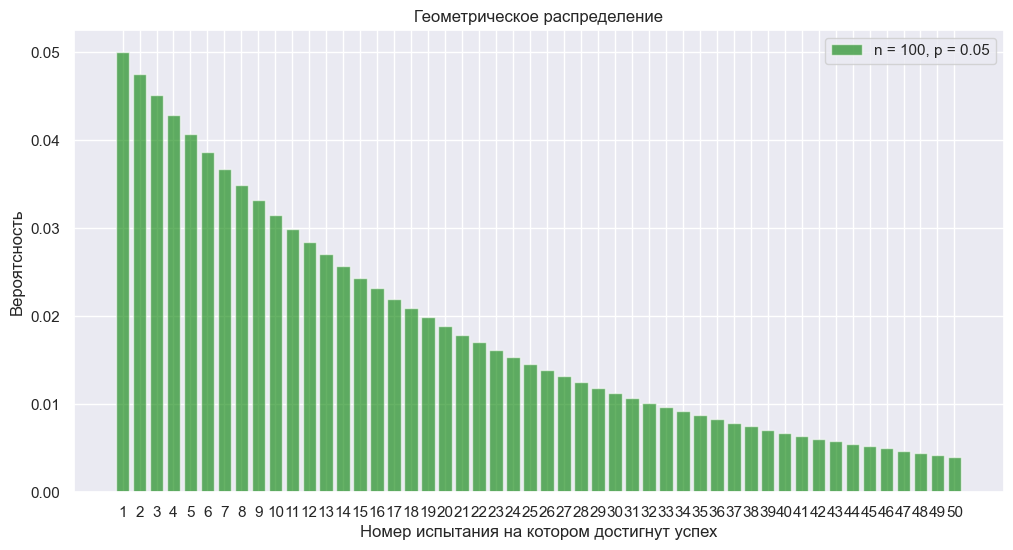

In [44]:
sns.set(style="dark")

# размер графика
plt.figure(figsize=(12, 6))
# вид графика
plt.bar(x, geometric_pmf, color='green', alpha=0.6, label=f'n = {n}, p = {p}')
# настраиваем ось абсцисс 
plt.xticks(np.arange(1, 51, 1))  
# а теперь ординат
max_prob = max(geometric_pmf)  # 
plt.yticks(np.arange(0, max_prob + 0.01, 0.01))
# название абсциссы
plt.xlabel('Номер испытания на котором достигнут успех')
# а теперь ординаты
plt.ylabel('Вероятсность')
# оглавление
plt.title('Геометрическое распределение')
# добавляем легенду
plt.legend()
# добавляем сетку
plt.grid(True)
plt.show()

Мы проводим испытание с вероятностью успеха 5%. Эксперимент будет завершен, когда реализуется "успех". Распределение ассиметрично и имеет правый хвост, то есть вероятность снижается по мере увеличения значения случайной величины. В самом деле, вероятность, что событие успеха реализуется с первого раза выше, чем вероятность реализации неуспешных событий раз за разом до наступления успешного.

Посмотрим как отреагирует распределение при увеличении параметра

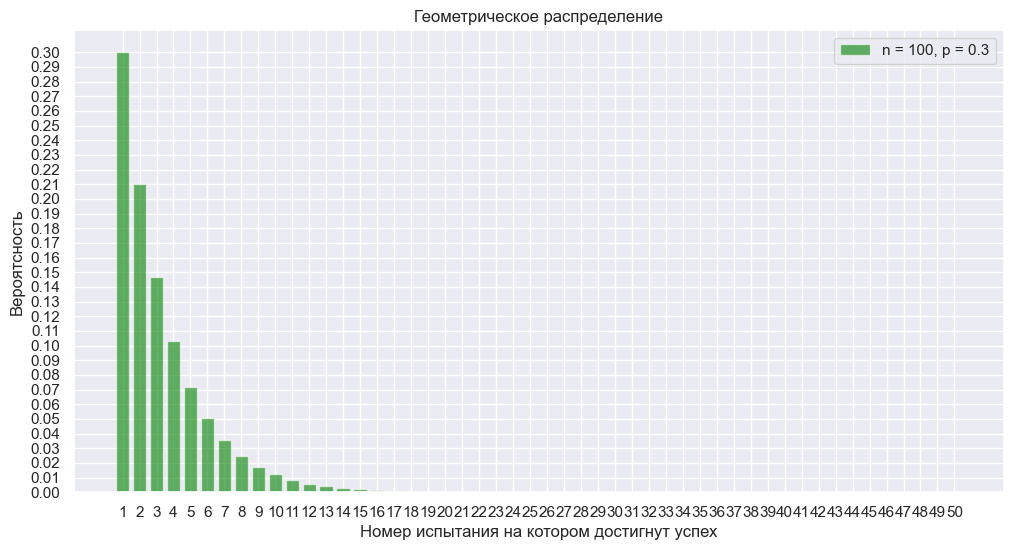

In [47]:
p = 0.3
geometric_pmf = stats.geom.pmf(x, p)


# размер графика
plt.figure(figsize=(12, 6))
# вид графика
plt.bar(x, geometric_pmf, color='green', alpha=0.6, label=f'n = {n}, p = {p}')
# настраиваем ось абсцисс 
plt.xticks(np.arange(1, 51, 1))  
# а теперь ординат
max_prob = max(geometric_pmf)  # 
plt.yticks(np.arange(0, max_prob + 0.01, 0.01))
# название абсциссы
plt.xlabel('Номер испытания на котором достигнут успех')
# а теперь ординаты
plt.ylabel('Вероятсность')
# оглавление
plt.title('Геометрическое распределение')
# добавляем легенду
plt.legend()
# добавляем сетку
plt.grid(True)
plt.show()

По мере увеличения параметра *p*, а значит снижения вероятности неуспеха (1-p) график сдвигается влево и концентрируется около небольших значений случайной величины.

Получается, при большем **p** вероятность успеха увеличивается и, следовательно, увеличивается вероятность скорости достижения успеха. Дисперсия и матожидание также сокращаются.

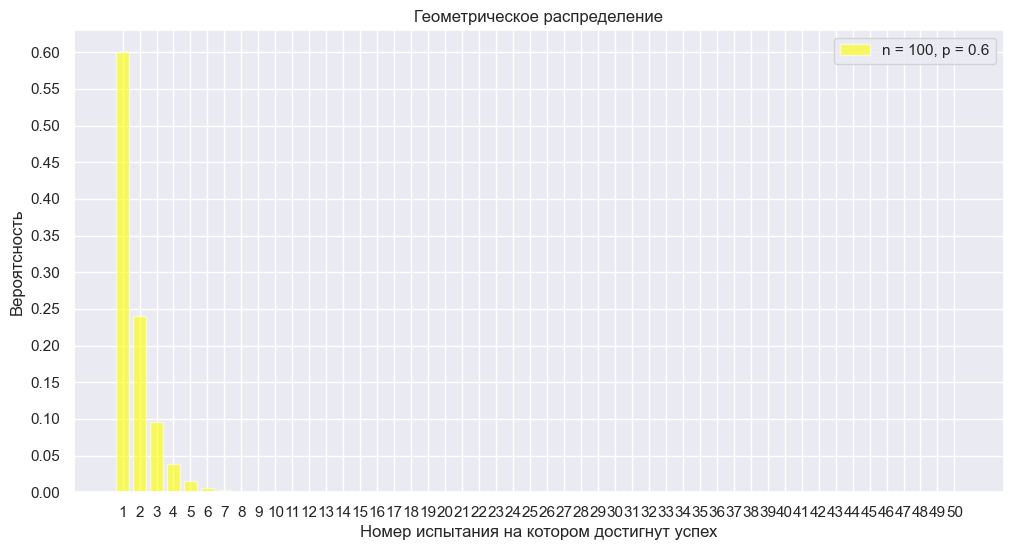

In [49]:
p = 0.6
geometric_pmf = stats.geom.pmf(x, p)


# размер графика
plt.figure(figsize=(12, 6))
# вид графика
plt.bar(x, geometric_pmf, color='yellow', alpha=0.6, label=f'n = {n}, p = {p}')
# настраиваем ось абсцисс 
plt.xticks(np.arange(1, 51, 1))  
# а теперь ординат
max_prob = max(geometric_pmf)  # 
plt.yticks(np.arange(0, max_prob + 0.01, 0.05))
# название абсциссы
plt.xlabel('Номер испытания на котором достигнут успех')
# а теперь ординаты
plt.ylabel('Вероятсность')
# оглавление
plt.title('Геометрическое распределение')
# добавляем легенду
plt.legend()
# добавляем сетку
plt.grid(True)
plt.show()

**Применение геометрического распределения**

Геометрическое распределение удобно в реальной жизни для определения вероятности успеха/достижения цели при заданном количестве испытаний. Например: 

- Определение количества отправленных рассылок до совершения покупки. Покупка - событие успеха. Тогда, используя функцию распределения, можно определить вероятность покупки при отправке n-количества рассылок. 
- В тайм-менеджменте расчет вероятности выполнить задачу за ограниченное время с определенного раза.
- Попасть три раза в баскетбольное кольцо. Здесь успех - это попадание три раза, а случайная величина - это с какого раза удастся. 

### Равномерное распределение

В равномерном распределении любое значение случайной величины может реализоваться с одинаковой вероятность.

Распределение задается параметрами **a** и **b** - это наименьшее и наибольшее принимаемое значение соответственно.

Каждое значение случайной величины имеет шанс реализоваться **1/n**, где **n = b - a + 1** - количество возможных значений случайной величины.

**Функция распределения**

$$
P(X = x) = \frac{1}{n}
$$

для $ \ x = a, a+1, a+2, \dots, b \ $, где:
- $ \ a \ $ минимальное значение $ \ X \ $,
- $ \ b \ $ максимальное значение $ \  X \ $,
- $ \ n  =  b - a + 1 \ $. 


**Характиеристики**
1. Матожидание:
   $$
   E(X) = \frac{a + b}{2}
   $$

2. Дисперсия:
   $$
   \text{Var}(X) = \frac{n^2 - 1}{12}
   $$

Визуализируем распределение

In [54]:
# Задаем диапазон для равномерного распределения 
a = 1  # Нижняя граница 
b = 16  # Верхняя граница 

# Генерируем значения от 1 до 30 
x = np.arange(a, b)

# Рассчитываем PMF для равномерного распределения 
uniform_pmf = stats.randint.pmf(x, a, b)

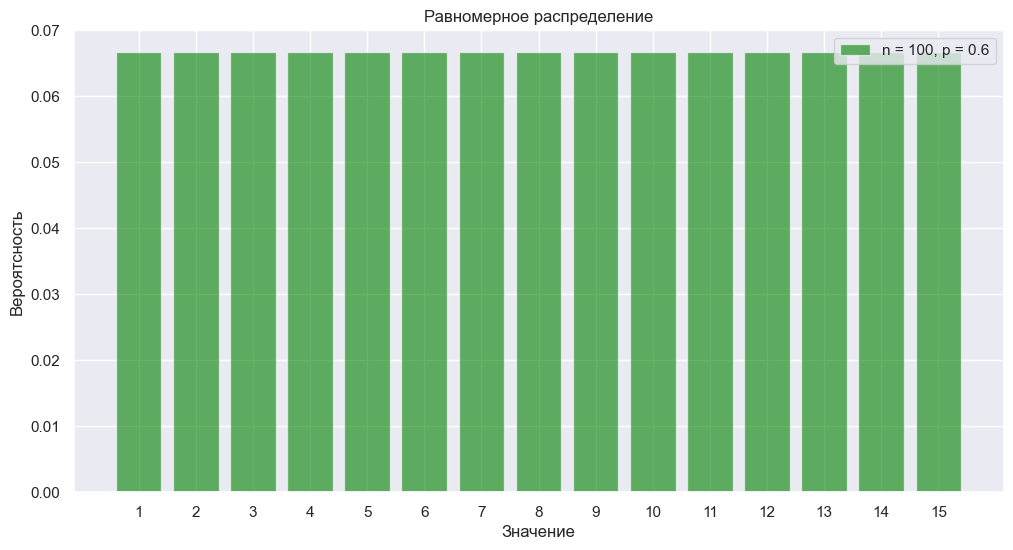

In [55]:
# размер графика
plt.figure(figsize=(12, 6))
# вид графика
plt.bar(x, uniform_pmf, color='green', alpha=0.6, label=f'n = {n}, p = {p}')
# настраиваем ось абсцисс 
plt.xticks(np.arange(1, 16, 1))  
# а теперь ординат
max_prob = max(uniform_pmf)  # 
plt.yticks(np.arange(0, max_prob + 0.01, 0.01))
# название абсциссы
plt.xlabel('Значение')
# а теперь ординаты
plt.ylabel('Вероятсность')
# оглавление
plt.title('Равномерное распределение')
# добавляем легенду
plt.legend()
# добавляем сетку
plt.grid(True)
plt.show()

Увеличение n будет вести к сокращение вероятности каждого значения

### Распределение Пуассона

Распределение Пуассона описывет вероятность встретить случайное событие n-раз в некотором временном интервале (час/день/месяц/столетие и тд) с определенным средним/матожиданием количеством произошедших событий в данном интервале. Распределение задается одним единственным параметром - лямбдой; оно же среднее.

Распределение зиждится на следующих предпосылках и ограничениях:
1. Независимость событий: реализовавшееся событие не оказывает никакого влияние на реализацию последующего.
2. Значения случайной величины - это количество случившихся событий в промежутке, т.е. представляют множество натуральных чисел с нулем.
3. Матожидание - константа и должна быть известа.
4. Каждое событие должно иметь одинаковую вероятность произойти в любой момент времени периода. Не должно быть так, что в начале интервала событие менее вероятно, чем в конце.
5. Два события не могут произойти в один момент времени. То есть, в каждом подинтервале либо происходит одно событие, либо ни одно.

У распределения один единственный параметр - матожидание (λ).

**Функция распределения** 

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

для $ \ k = 0, 1, 2, 3, \dots \ $ , где:
- $ \ \lambda \ $  среднее количество событий, которое случается в рассматриваемый период времен,
- $ \ k! \ $ факториал числа $ \ k \ $,
- $\ e \$ число Эйлера (приближённо 2.71828).

**Характеристики**:
1. Матожидание:
   $$
   E(X) = \lambda
   $$

2. Дисперсия:
   $$
   \text{Var}(X) = \lambda
   $$

Создадим четыре распределения Пуассона с разными параметрами

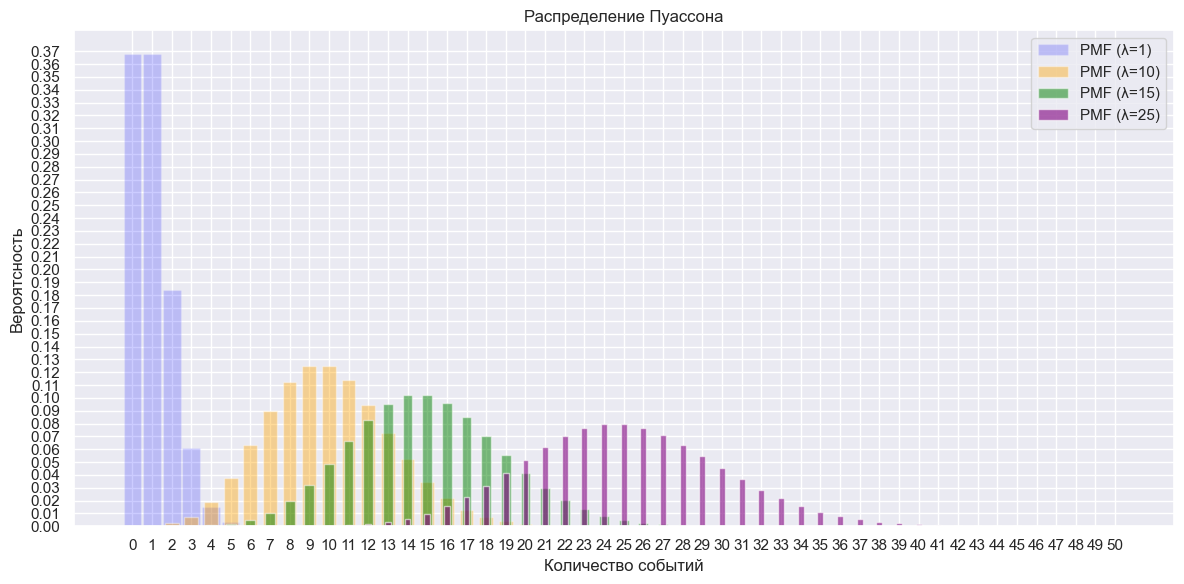

In [60]:
# Среднее количество событий 
λ = 1  

# Генерируем значения количества событий 
x = np.arange(0, 51)  # From 0 to 19 events

# Рассчитываем PMF для распределения Пуассона 
poisson_pmf = stats.poisson.pmf(x, λ)



poisson_pmf_10 = stats.poisson.pmf(x, 10)

poisson_pmf_15 = stats.poisson.pmf(x, 15)

poisson_pmf_25 = stats.poisson.pmf(x, 25)


plt.figure(figsize=(12, 6))
# вид графика
plt.bar(x, poisson_pmf, color='blue', alpha=0.2, width=0.9, label=f'PMF (λ={λ})')

plt.bar(x, poisson_pmf_10, color='orange', alpha=0.4, width=0.7,  label=f'PMF (λ={10})')

plt.bar(x, poisson_pmf_15, color='green', alpha=0.5, width=0.5, label=f'PMF (λ={15})')

plt.bar(x, poisson_pmf_25, color='purple', alpha=0.6, width=0.3, label=f'PMF (λ={25})')

# настраиваем ось абсцисс 
plt.xticks(np.arange(0, 51, 1))  
# а теперь ординат
max_prob = max(poisson_pmf)  # 
plt.yticks(np.arange(0, max_prob + 0.01, 0.01))
# название абсциссы
plt.xlabel('Количество событий')
# а теперь ординаты
plt.ylabel('Вероятсность')
# оглавление
plt.title('Распределение Пуассона')
# добавляем легенду
plt.legend()
# добавляем сетку
plt.grid(True)
plt.tight_layout()
plt.show()

Вершина каждого распределения соответствует лямбде и смещается вправо по мере увеличения параметра. Это значит, что вероятность встретить большие значения увеличивается по мере увеличения лямбы. График приобретает симметрию и становится колокообразным.  Дисперсия Пуассона равна тоже лямбде, поэтому увеличивая лямбду мы увеличиваем вариацию.
Значения случайной величины не ограничены никак сверху, поэтому можно сказать, что основная доля вероятности концентрируется вокруг среднего значения, и чем лямбда меньше, тем плотнее эта концентрация, т.к. дисперсия сокращается.

#### Распределение Пуассона и Биномиальное

Существует **предельная теорема Пуассона** или [**law of rare events**](https://en.m.wikipedia.org/wiki/Poisson_limit_theorem), которая фиксирует связь между двумя распределениями. В случае, если у биномиального распределения достаточно много испытаний (скажем, больше 30) и наступление успешного события маловероятно, тогда распределение Пуассона с параметром матожидания биномиального распределения точно апроксимирует вероятность насутпления n количества успехов. 

Давайте проверим эту теорму. Визуализируем две ситации: в одной вероятность наступления успеха будет очень маленькой в бином. распределении, а в другой очень выосокой и сравним с соответствующим распределением Пуассона

In [65]:
n = 50
p = 0.005
bin_pmf = stats.binom.pmf(x, n, p)

λ = n * p
poisson_pmf = stats.poisson.pmf(x, λ)

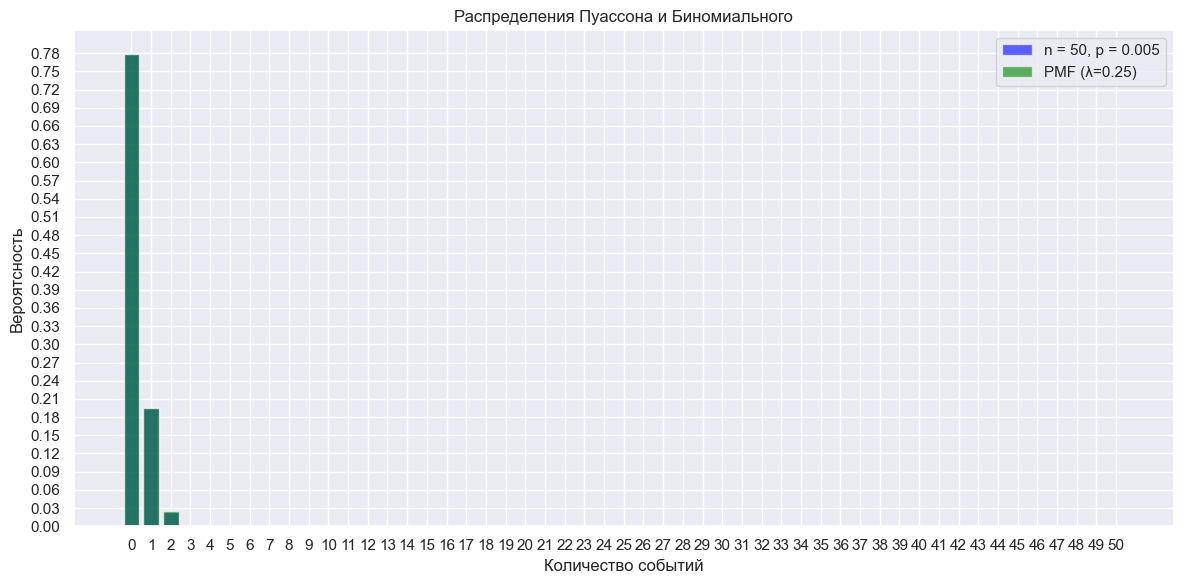

In [66]:




plt.figure(figsize=(12, 6))
plt.bar(x, bin_pmf, color='blue', alpha=0.6, label=f'n = {n}, p = {p}')
plt.bar(x, poisson_pmf, color='green', alpha=0.6, label=f'PMF (λ={λ})')
# настраиваем ось абсцисс 
plt.xticks(np.arange(0, 51, 1))  
# а теперь ординат
max_prob = max(poisson_pmf)  # 
plt.yticks(np.arange(0, max_prob + 0.01, 0.03))
# название абсциссы
plt.xlabel('Количество событий')
# а теперь ординаты
plt.ylabel('Вероятсность')
# оглавление
plt.title('Распределения Пуассона и Биномиального')
# добавляем легенду
plt.legend()
# добавляем сетку
plt.grid(True)
plt.tight_layout()
plt.show()

Распределения слились. Теперь увеличим вероятность

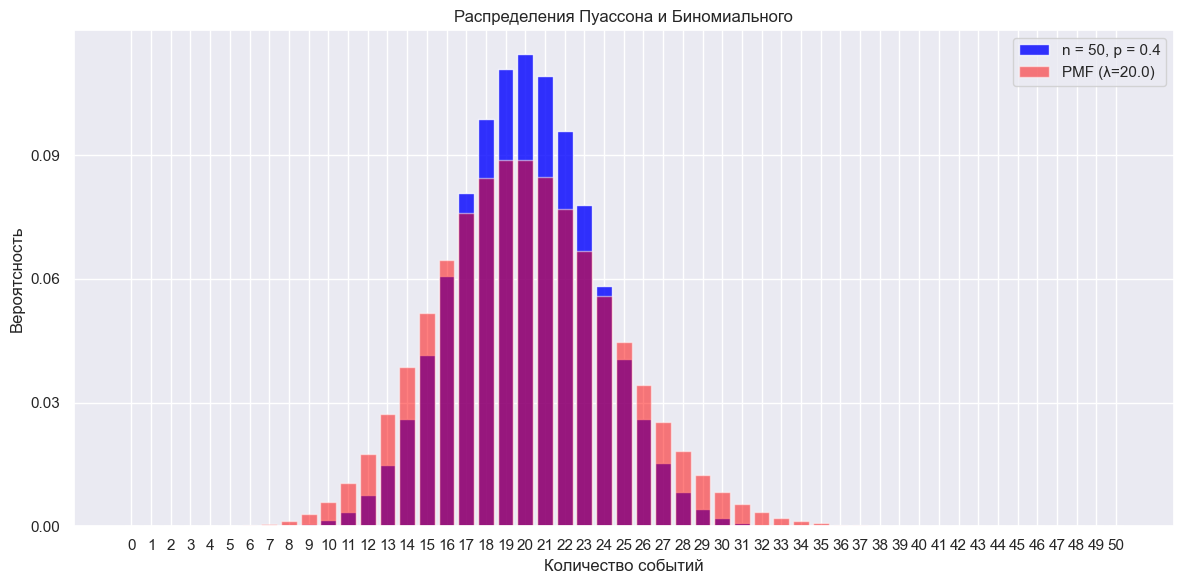

In [68]:
p = 0.4
bin_pmf = stats.binom.pmf(x, n, p)

λ = n * p
poisson_pmf = stats.poisson.pmf(x, λ)

plt.figure(figsize=(12, 6))
plt.bar(x, bin_pmf, color='blue', alpha=0.8, label=f'n = {n}, p = {p}')
plt.bar(x, poisson_pmf, color='red', alpha=0.5, label=f'PMF (λ={λ})')
# настраиваем ось абсцисс 
plt.xticks(np.arange(0, 51, 1))  
# а теперь ординат
max_prob = max(poisson_pmf)  # 
plt.yticks(np.arange(0, max_prob + 0.01, 0.03))
# название абсциссы
plt.xlabel('Количество событий')
# а теперь ординаты
plt.ylabel('Вероятсность')
# оглавление
plt.title('Распределения Пуассона и Биномиального')
# добавляем легенду
plt.legend()
# добавляем сетку
plt.grid(True)
plt.tight_layout()
plt.show()

С увеличеним **p** параметра в биномиальном распределении распределения становятся отличительней, а приблизить биномиальное распределение распределение Пуассона с параметром матожидания биномиального уже не удастатся.

## Непрерывные случайные величины




Для непрерывной случайной величины $ \ X \ $, **функция плотности (Probability Density Function/PDF)** и  обозначается $ \ f_X(x) \ $, определеяется как производная **функции распределения (CDF)**  $\ F_X(x) \ $. 

CDF $\ F_X(x) \ $ дает вероятность, что случайная величина $ \ X \ $ примет значение меньше или равное $ \ x \ $ и определяется как:

$$
F_X(x) = P(X \leq x)
$$

PDF это производная CDF:

$$
f_X(x) = \frac{d}{dx} F_X(x)
$$

Свойства  PDF:
1. **Не отрицательная**:
   $$
   f_X(x) \geq 0 \quad \text{для всех} \, x
   $$

2. **CDF может быть получена путем интегрирования PDF**:
   $$
   F_X(x) = \int_{-\infty}^{x} f_X(t) \, dt
   $$

3. **Совокупная вероятность должна быть равна единице:ь**:
   $$
   \int_{-\infty}^{\infty} f_X(x) \, dx = 1
   $$





### Равномерное распределение

Функция задается двумя параметрами - a и b, где а - начальня точка отрезка, а b - конечная.



**PDF функция**:

$$
f_X(x) = 
\begin{cases}
\frac{1}{b - a}, & \text{для } a \leq x \leq b, \\
0, & \text{иначе}.
\end{cases}
$$


**CDF функция**:

$$
F_X(x) = 
\begin{cases}
0, & \text{для } x < a, \\
\frac{x - a}{b - a}, & \text{для } a \leq x \leq b, \\
1, & \text{для } x > b.
\end{cases}
$$

где:
- $ \ a \ $ нижняя граница отрезка,
- $ \ b \ $ верхняя граница отрезка.


**Характеристики**:

1. Матожидание :
   $$
   E(X) = \frac{a + b}{2}
   $$

2. Дисперсия:
   $$
   \text{Var}(X) = \frac{(b - a)^2}{12}
   $$






Посмотрим как выглядит функции плотности и распределения в равномерном случае. 

In [76]:
a = 1
b = 10
n = 10000

# получим вектор 1000 значений, полученных из равнормерного распределения
uniform_distribution = np.linspace(a, b, 1000)


uniform_pdf = stats.uniform.pdf(uniform_distribution, loc=a, scale=b-a)  # PDF
uniform_cdf = stats.uniform.cdf(uniform_distribution, loc=a, scale=b-a)  # CDF

In [77]:
uniform_pdf = stats.uniform.pdf(uniform_distribution, loc=a, scale=b-a)  # PDF
uniform_cdf = stats.uniform.cdf(uniform_distribution, loc=a, scale=b-a)  # CDF

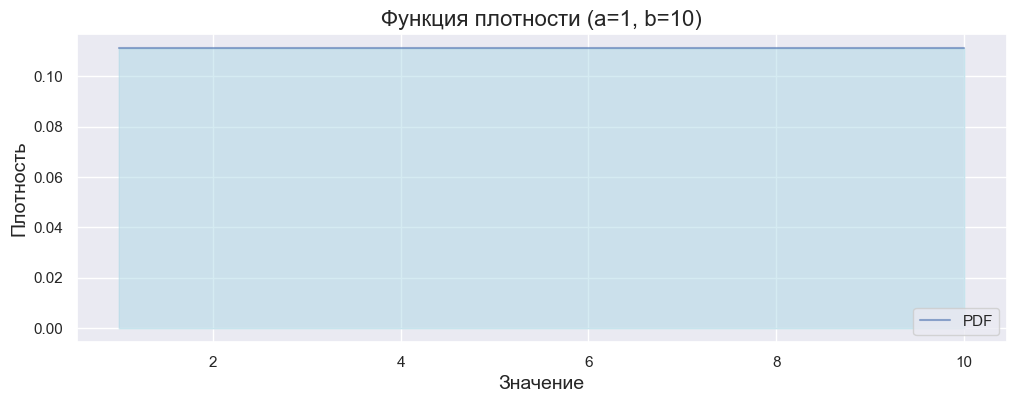

In [78]:
plt.figure(figsize=(12, 4))


plt.plot(uniform_distribution, uniform_pdf, 'b-', label='PDF', alpha=0.6)
plt.fill_between(uniform_distribution, uniform_pdf, alpha=0.5, color='lightblue')
plt.title(f'Функция плотности (a={a}, b={b})', fontsize=16)
plt.xlabel('Значение', fontsize=14)
plt.ylabel('Плотность', fontsize=14)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

Всё похоже на дискретный случай функции вероятности равномерного распределения: каждому значению случайной величины соответствует одинаковое значение pdf, а сам график представлен горизонтальной прямой

С увеличением отреза будет сокращаться, соответственно, значение плотности.

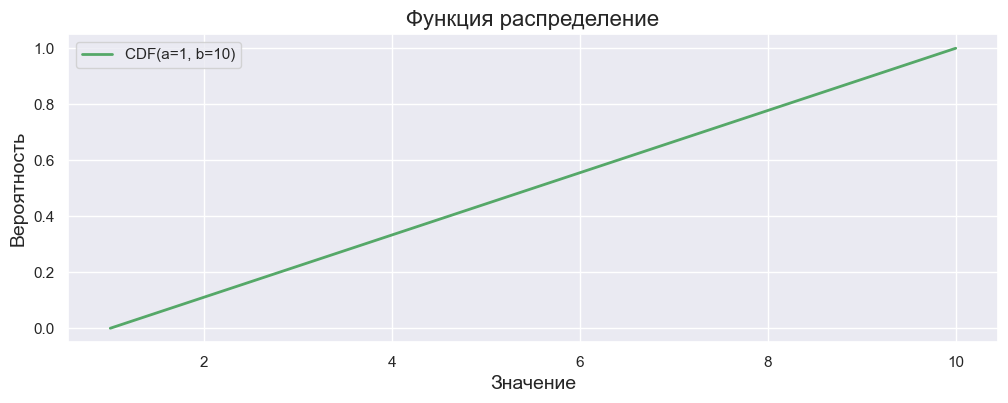

In [80]:
plt.figure(figsize=(12, 4))
plt.plot(uniform_distribution, uniform_cdf, 'g-', label=f'CDF(a={a}, b={b})', lw=2)

plt.title('Функция распределение', fontsize=16)
plt.xlabel('Значение', fontsize=14)
plt.ylabel('Вероятность', fontsize=14)

plt.grid(True)

plt.legend()

plt.show()

Функция распределения является первообразной функции плотности, которая представляет из себя горизонтальную прямую. Значит, функция распределения будет просто возрастающая прямая.

### Экспоненциальное распределени

Функция задается одним единственным параметром - λ (лямбдой)

**PDF функция**

$$
f_X(x) = 
\begin{cases}
\lambda e^{-\lambda x}, & \text{для } x \geq 0, \\
0, & \text{для } x < 0.
\end{cases}
$$

где:
- $ \ \lambda > 0 \ $ параметр, который определяет начальную точку на оси Y,
- $ \ e \ $ число Эйлера (приближённо 2.71828).


 **CDF функция**
   $$
   F_X(x) = 
   \begin{cases}
   1 - e^{-\lambda x}, & \text{для } x \geq 0, \\
   0, & \text{для } x < 0.
   \end{cases}
   $$



**Характеристики**:

1. Матожидание:
   $$
   E(X) = \frac{1}{\lambda}
   $$

2. Дисперсия:
   $$
   \text{Var}(X) = \frac{1}{\lambda^2}
   $$



In [84]:
λ = [1, 2, 3, 4]


# генерируем значения для оси x
x = np.linspace(0, 8, 1000)

# функция expon в качестве параметра не лямбду принимает, а матожидание
#exp_pdf = stats.expon.pdf(x, scale=1/λ)


Визуализируем функцию плотности для разных лямбд

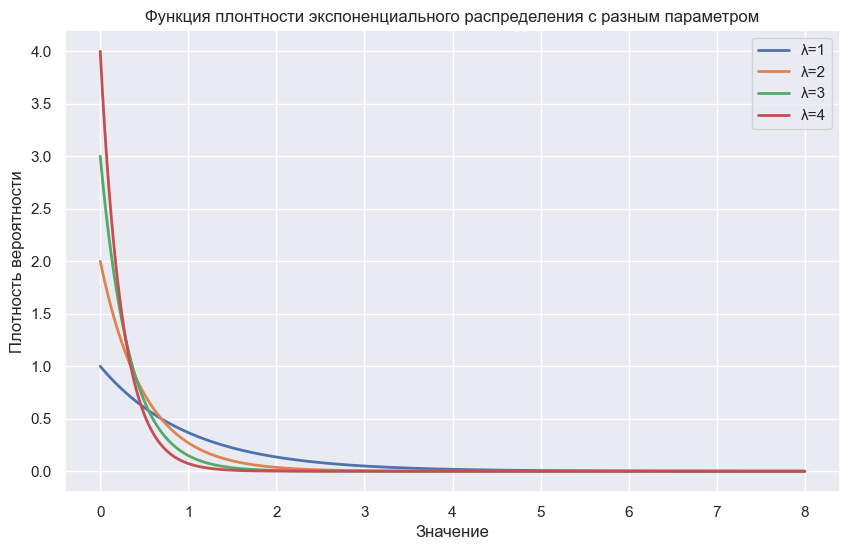

In [86]:
plt.figure(figsize=(10, 6))

for lambda_param in λ:
    exp_pdf = stats.expon.pdf(x, scale=1/lambda_param)  
    plt.plot(x, exp_pdf, label=f'λ={lambda_param}', lw=2)

plt.title('Функция плонтности экспоненциального распределения с разным параметром', fontsize=12)
plt.xlabel('Значение', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)

plt.grid(True)

plt.legend()

plt.show()

Эксоненциальная функция плотности убывающая. 

Параметр лямбда определяет: 
1. начальную точку на оси ординат откуда начинается график
2. скорость убывания значения функции. 

Чем выше параметр λ, тем стремительней убывает функция. Это и логично: фукция плотности - это производная функции распределения конечное значение функции которой единица, а значит площадь под графиком должна быть равна единице. Поскольку λ определяет старт функции, то для накопления единичной площади она должна быстрее убывать. 




Посмотрим теперь на функцию распределения

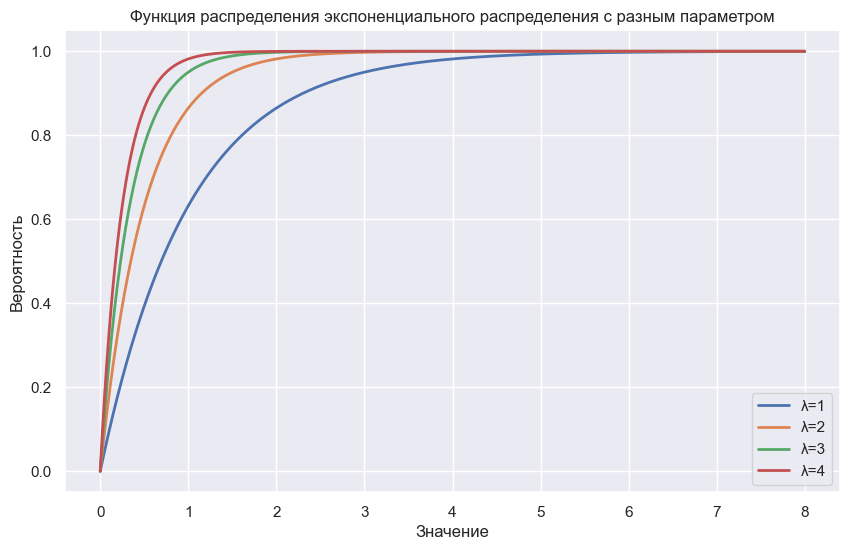

In [89]:
plt.figure(figsize=(10, 6))

for lambda_param in λ:
    exp_pdf = stats.expon.cdf(x, scale=1/lambda_param)  
    plt.plot(x, exp_pdf, label=f'λ={lambda_param}', lw=2)

plt.title('Функция распределения экспоненциального распределения с разным параметром', fontsize=12)
plt.xlabel('Значение', fontsize=12)
plt.ylabel('Вероятность', fontsize=12)

plt.grid(True)

plt.legend()

plt.show()

С увеличением λ - увеличивается скорость роста функции

### Нормальное распределение

Функция определяется двумя параметрами - матожиданием ($ \ \mu \ $) и дисперсей ($ \ \sigma^2 \ $ )

**PDF функция**:

$$
f_X(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{(x - \mu)^2}{2 \sigma^2} \right)
$$

где:
- $\ \mu \ $ матожидание/среднее,
- $ \ \sigma^2 \ $ дисперсия,
- $ \ \exp(\cdot) \ $ экспоненцаильная функция


**CDF функция**:

   $$
   F_X(x) = \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{x - \mu}{\sqrt{2 \sigma^2}} \right) \right]
   $$


**Характеристики**:

1. Матожидание:
   $$
   E(X) = \mu
   $$

2. Дисперсия:
   $$
   \text{Var}(X) = \sigma^2
   $$

Для начала посмотрим, как меняется распределение от изменения сигмы

In [94]:
mu = [0, 1, 3]
sigma = 1
#normal_pdf = stats.norm.pdf(x, loc=mu, scale=sigma)
#x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
x = np.linspace(-10, 10, 1000)


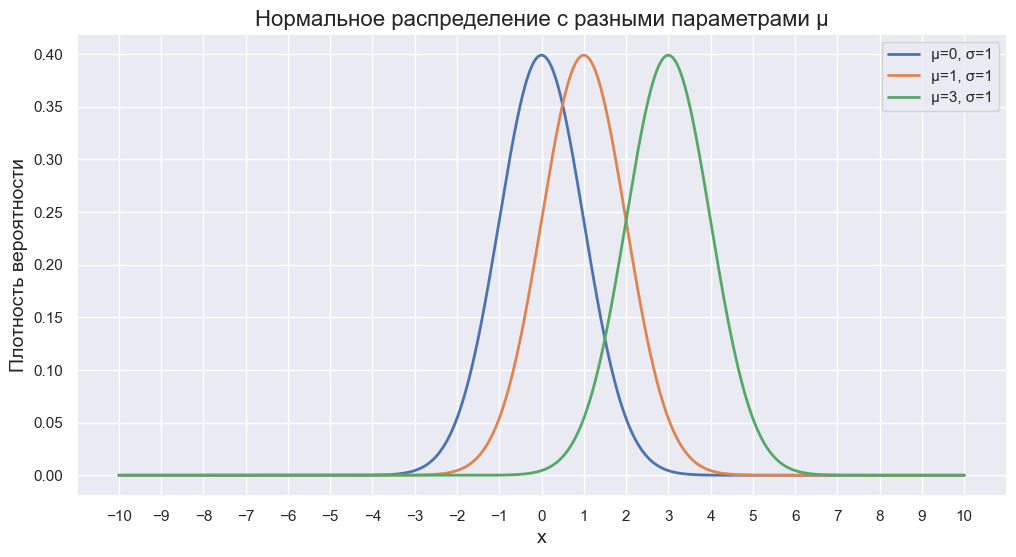

In [95]:
plt.figure(figsize=(12, 6))

for mu in mu:
    normal_pdf = stats.norm.pdf(x, loc=mu, scale=sigma)  
    plt.plot(x, normal_pdf, label=f'μ={mu}, σ={sigma}', lw=2)

plt.title('Нормальное распределение с разными параметрами μ', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('Плотность вероятности', fontsize=14)
plt.xticks(np.arange(-10, 11, 1))

plt.grid(True)

plt.legend()

plt.show()

График выглядит как колокол. Значение в центре - наиболее вероятно, а при отдалении от центра влево или вправо вероятность сокращается с одинаковой скоростью.

Мы видим, что параметр μ отвечает за расположение цента - точки максимума функции. Если максимум находится в х = 1, то и μ будет равен единице. 

Теперь посмотрим как будет влиять изменение сигмы

In [98]:
mu = 1
sigma = [1, 2, 4]

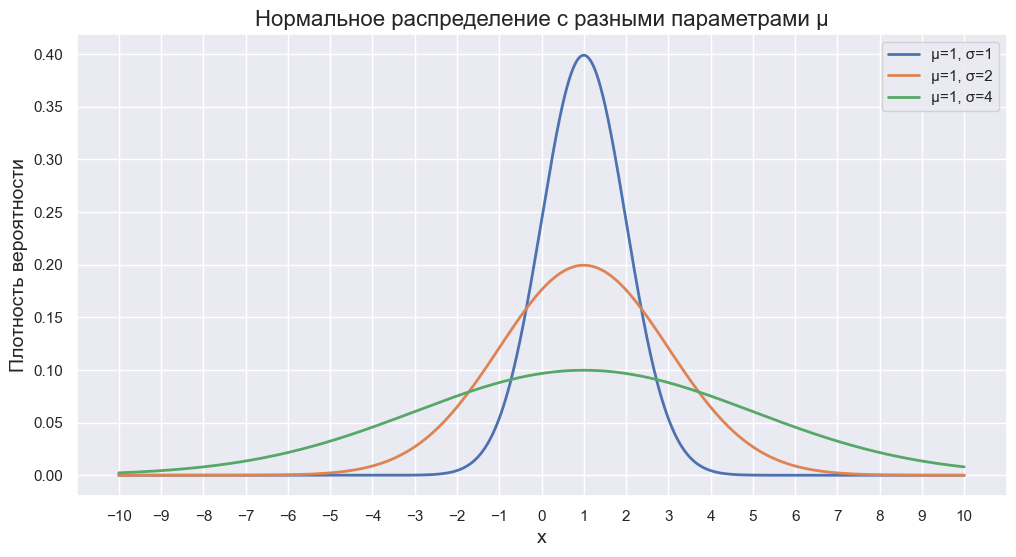

In [99]:
plt.figure(figsize=(12, 6))

for sigma in sigma:
    normal_pdf = stats.norm.pdf(x, loc=mu, scale=sigma)  
    plt.plot(x, normal_pdf, label=f'μ={mu}, σ={sigma}', lw=2)

plt.title('Нормальное распределение с разными параметрами μ', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('Плотность вероятности', fontsize=14)
plt.xticks(np.arange(-10, 11, 1))

plt.grid(True)

plt.legend()

plt.show()

Сигма отвечает за ширину. Увеличивая σ распределение сглаживается, становится менее предсказуемым.

Посмотрим на график функции распределения и как он меняется от изменения параметров

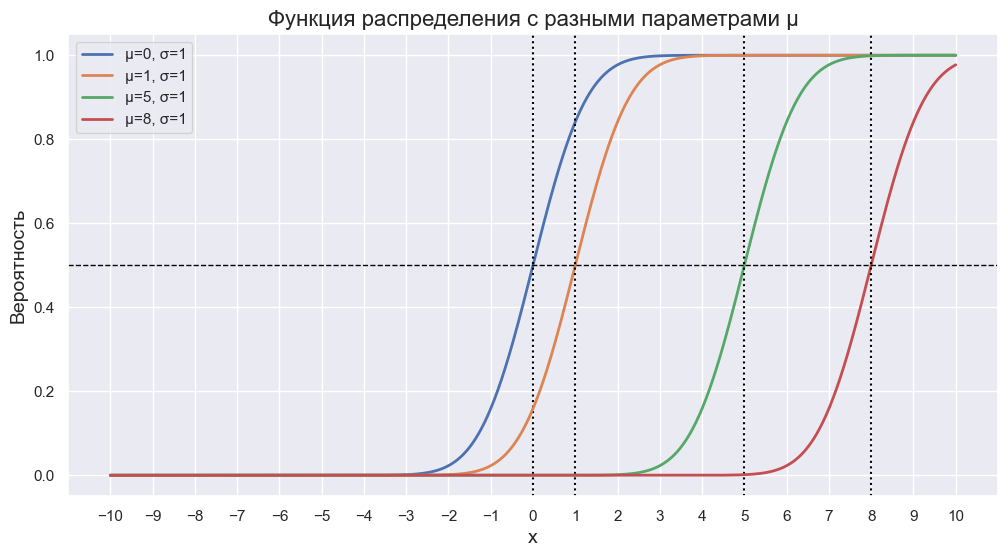

In [102]:
mu = [0,1, 5, 8]
sigma = 1


plt.figure(figsize=(12, 6))

for mu in mu:
    normal_pdf = stats.norm.cdf(x, loc=mu, scale=sigma)  
    plt.plot(x, normal_pdf, label=f'μ={mu}, σ={sigma}', lw=2)
    plt.axvline(x=mu, color='black', linestyle=':', linewidth=1.5)

plt.title('Функция распределения с разными параметрами μ', fontsize=16)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=1)
plt.xlabel('x', fontsize=14)
plt.ylabel('Вероятность', fontsize=14)
plt.xticks(np.arange(-10, 11, 1))

plt.grid(True)

plt.legend()

plt.show()

На графике четыре распределения с разными параметрами мю и одинаковой дисперсией. Изменение мю смещает график в сторону самого параметра мю. График распределения функции возростающий с неотрицательными значениями функциями, который покрывает отрезок по оси ординат от 0 до 1, а значение параметра мю соответствует ровно половине графика, т.е. значению функции равному 0.5: с правой и левой стороны от мю сосредоточено 0.5 вероятности

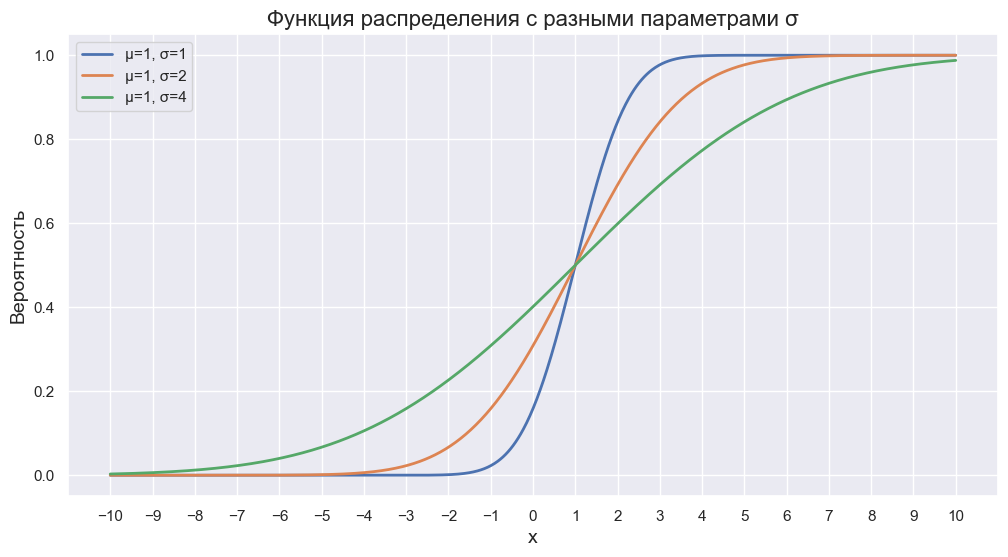

In [104]:
mu = 1
sigma = [1, 2, 4]


plt.figure(figsize=(12, 6))

for sigma in sigma:
    normal_pdf = stats.norm.cdf(x, loc=mu, scale=sigma)  
    plt.plot(x, normal_pdf, label=f'μ={mu}, σ={sigma}', lw=2)

plt.title('Функция распределения с разными параметрами σ', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('Вероятность', fontsize=14)
plt.xticks(np.arange(-10, 11, 1))

plt.grid(True)

plt.legend()

plt.show()

Увеличение дисперсии отржается на графике медленным ростом функции.

### Логнормальное распределение

**PDF функция**

$$
f_X(x) = \frac{1}{x \sigma \sqrt{2 \pi}} \exp \left( -\frac{(\ln x - \mu)^2}{2 \sigma^2} \right), \quad x > 0, \sigma > 0
$$ 

Величина$ \ X \ $ имеет логнормальное распределение с параметрами $ \ \mu $ и  $ \ \sigma \ $: $ \ X \ $ ~ $ \ LogN (\mu, \sigma^2) \ $


Логнормальное распределение связано с нормальным. Если величина $ \ X \ $ ~ $ \ LogN (\mu, \sigma^2) \ $ , то величина $ \ Y  \ = \ ln(X) \ $ распределена $ \ Y \ $ ~ $ \ N(\mu, \sigma^2) \ $ 

И наоборот:
если $ \ X \ $ ~ $ \ N(\mu, \sigma^2) \ $, то величина $ \ Y \  = \exp (X) \ $ распределена $ \ Y \ $ ~  $ \ LogN(\mu, \sigma^2) \ $


Переход от исходного распределения к распределению логарифомв, называют **Log-преобрзованием**


Посмотрим как выглядит

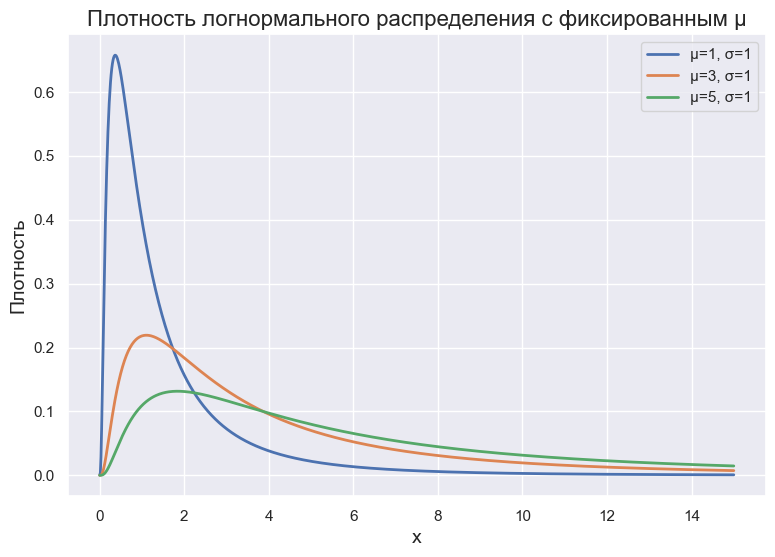

In [109]:
mu_fix = 1
mu_list = [1, 3, 5]

sigma_fix = 1
sigma_list = [1, 4, 7]

x = np.linspace(0, 15, 1000)

pdf_lognorm = stats.lognorm.pdf(x, s=sigma, scale=np.exp(mu))
cdf_lognorm = stats.lognorm.cdf(x, s=sigma, scale=np.exp(mu))

plt.figure(figsize=(9, 6))

# Построить PDF для каждого значения σ 
for mu in mu_list:
    pdf_values = stats.lognorm.pdf(x, s=sigma_fix, scale=mu)
    plt.plot(x, pdf_values, label=f'μ={mu}, σ={sigma_fix}', lw=2)

# Настройка подписей осей и заголовка 
plt.title('Плотность логнормального распределения с фиксированным μ', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('Плотность', fontsize=14)

# Добавить сетку и легенду 
plt.grid(True)
plt.legend()

# Показать график 
plt.show()

На графике, с разными параметрами распределения, мы видим: 

1. у распределения есть один единственный максимум;
2. с обеих сторон от максимума функция стремится к нулю, но с разной скоростью;
3. слева от максимума начинается резкое падение. Это значиит, что получить меньшее значение случайное величины относительно максимума маловероятно;
4. справа существует длинный пологий хвост. Значит, вероятность отклонения значения случайной величины в большую сторону от максимума выше, чем в меньшую.

Посмотрим на работу лог-преобразования

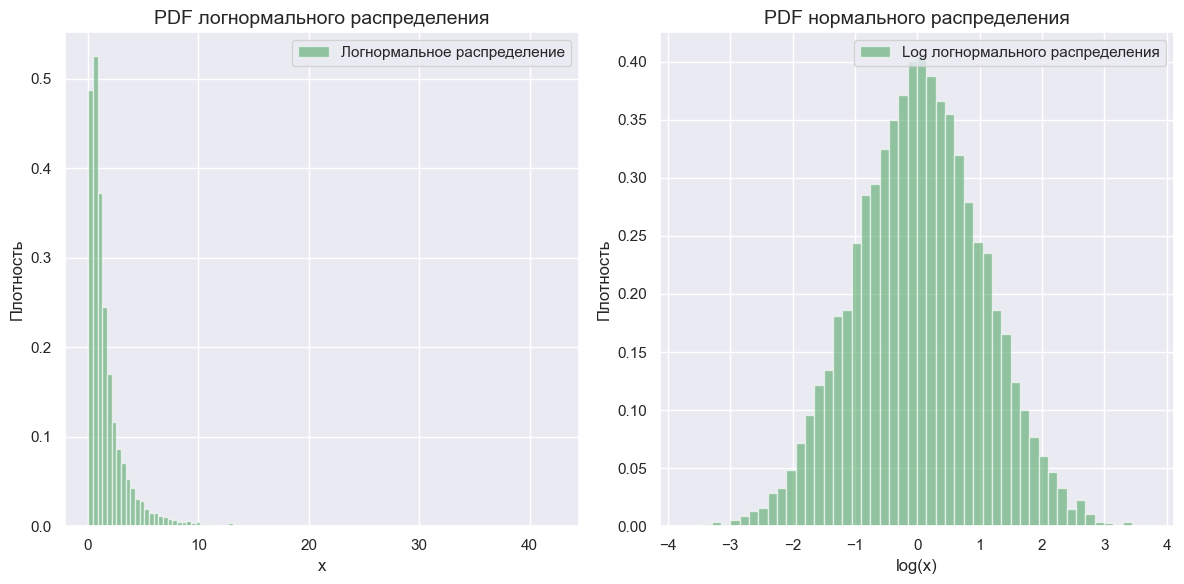

In [112]:
mu = 0.02  
sigma = 1  




# Генерируем выборку из логнормального распределения 
lognormal_samples = np.random.lognormal(mean=mu, sigma=sigma, size=10000)

# Берем логарифм выборки, чтобы получить нормальное распределение 
log_samples = np.log(lognormal_samples)

# Настройка стиля визуализации (
plt.figure(figsize=(12, 6))

# Подграфик слева: PDF логнормального распределения 
plt.subplot(1, 2, 1)
plt.hist(lognormal_samples, bins=100, density=True,  alpha=0.6, color='g', label='Логнормальное распределение' )
plt.title('PDF логнормального распределения', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('Плотность', fontsize=12)
plt.grid(True)
plt.legend()

# Подграфик справа: Гистограмма логарифма выборки 
plt.subplot(1, 2, 2)
plt.hist(log_samples, bins=50, density=True, alpha=0.6, color='g', label='Log логнормального распределения')



# Настройка подписей осей и заголовка 
plt.title('PDF нормального распределения', fontsize=14)
plt.xlabel('log(x)', fontsize=12)
plt.ylabel('Плотность', fontsize=12)
plt.grid(True)
plt.legend()

# Показать график )
plt.tight_layout()
plt.show()

In [113]:
np.log(np.mean(lognormal_samples))

0.5516186453724339

In [114]:
np.mean(log_samples)

0.03749470229786087

\\\ может убрать?

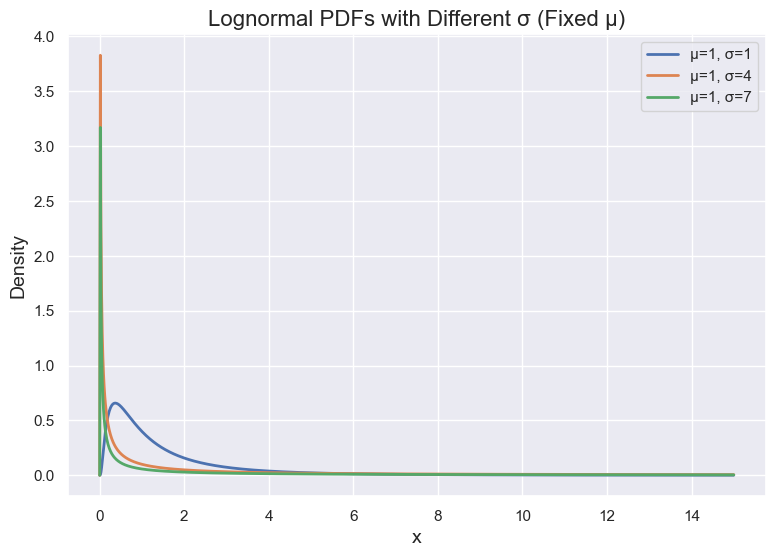

In [116]:

plt.figure(figsize=(9, 6))

# Построить PDF для каждого значения σ (Plot PDF for each σ value)
for sigma in sigma_list:
    pdf_values = stats.lognorm.pdf(x, s=sigma, scale=mu_fix)
    plt.plot(x, pdf_values, label=f'μ={mu_fix}, σ={sigma}', lw=2)

# Настройка подписей осей и заголовка (Set labels and title)
plt.title('Lognormal PDFs with Different σ (Fixed μ)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Добавить сетку и легенду (Add grid and legend)
plt.grid(True)
plt.legend()

# Показать график (Show the plot)
plt.show()

## Центральная предельная теорема

В этой части мы посмотрим скорость приближения нормального распредления выборочных средних при разных размерах выбоки. Будем постепенно увеличивать размер выборки и визуализировать. 

В качестве исходного распределения мы возьмем несколько дискретных и непрерывных случайных величин из рассмотренных выше.

In [119]:
# количество одинаково распределенных случайных величин/ размер выборки
n_values = [2, 10, 30, 50] 

# сгенерируем 10 000 реализованных значений выборочных средних
k = 10000

### Нормальное распределение

In [121]:
# параметры
mu = 1
sigma = 3

def sample_mean_norm_n(mu, sigma, n, k):
    sample_means = []
    for i in range(k):
    #реализация выборки одинаково распределенных n случайных величин с равномерным распределением
        sample_means.append(np.mean(np.random.normal(loc=mu, scale=sigma, size=n)))
    return sample_means

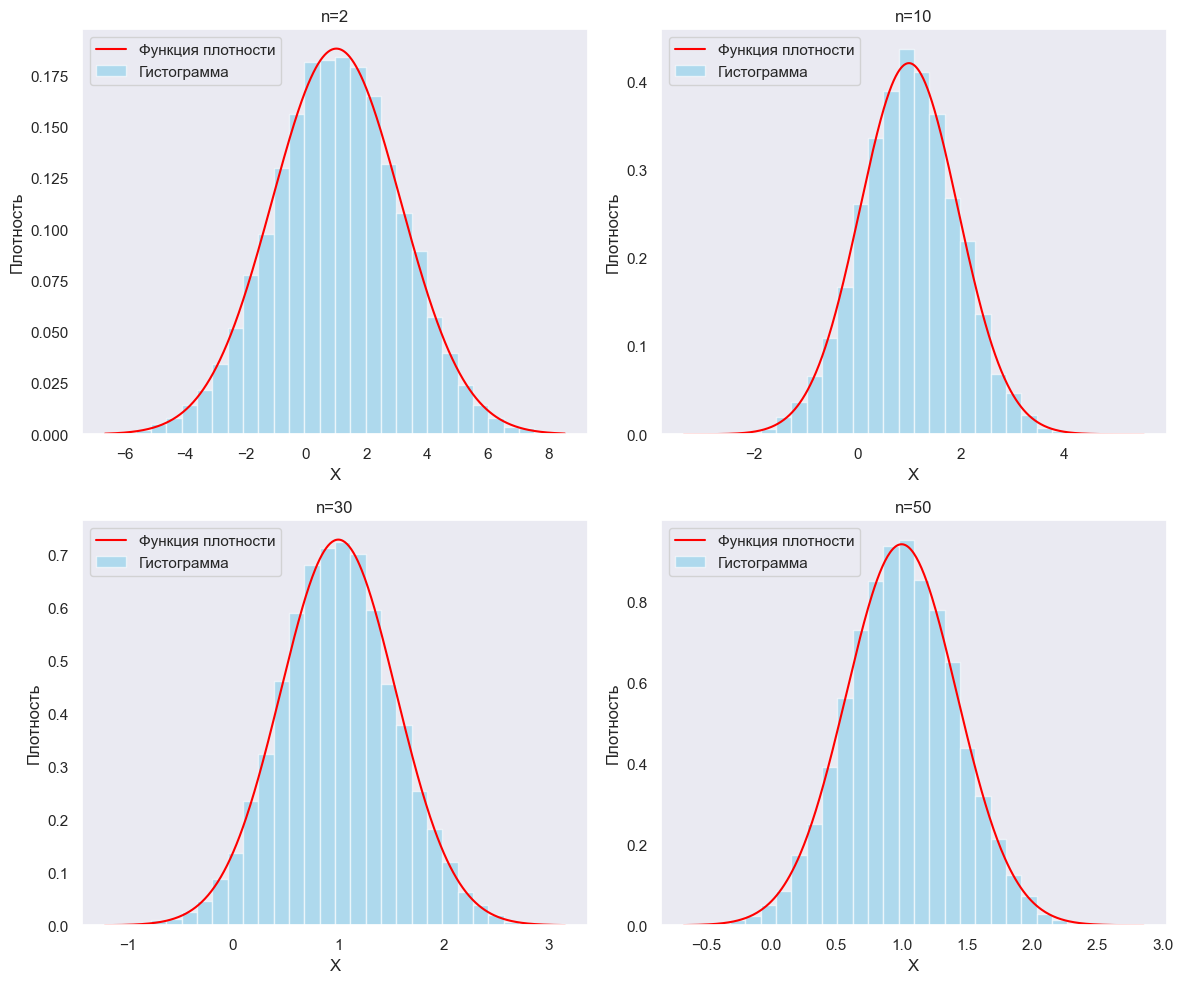

In [122]:

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()  

for idx, n in enumerate(n_values):
    sample_means = sample_mean_norm_n(mu, sigma, n, k)
    
    x_axis = np.arange(min(sample_means), max(sample_means), 0.01)
    
    mean_sample_means = mu  
    variance_sample_means = (sigma**2) / n  
    
    axs[idx].hist(sample_means, bins=30, density=True, alpha=0.6, color='skyblue')
    
    axs[idx].plot(x_axis, stats.norm.pdf(x_axis, mean_sample_means, np.sqrt(variance_sample_means)), color='red')
    
    axs[idx].set_title(f'n={n}')
    axs[idx].set_xlabel("X")
    axs[idx].set_ylabel("Плотность")
    
    axs[idx].legend(["Функция плотности", "Гистограмма"], loc='upper left')

plt.tight_layout()
plt.show()

С нормальным распределением всё просто: ЦПТ очень быстро приближает выборочные средние к нормальному, а размер выборки влияет лишь на дисперсию. 

### Равномерное распределени

In [125]:
#параметры
a = 0
b = 15


# реализация выборки одинаково распределенных n случайных величин с равномерным распределением
#uniform_distribution = np.random.uniform(a, b, n)

# для генерации используем функцию


def sample_mean_n(a, b, n, k):
    sample_means = []
    for i in range(k):
    #реализация выборки одинаково распределенных n случайных величин с равномерным распределением
        sample_means.append(np.mean(np.random.uniform(a, b, n)))
    return sample_means
    

Визуализируем

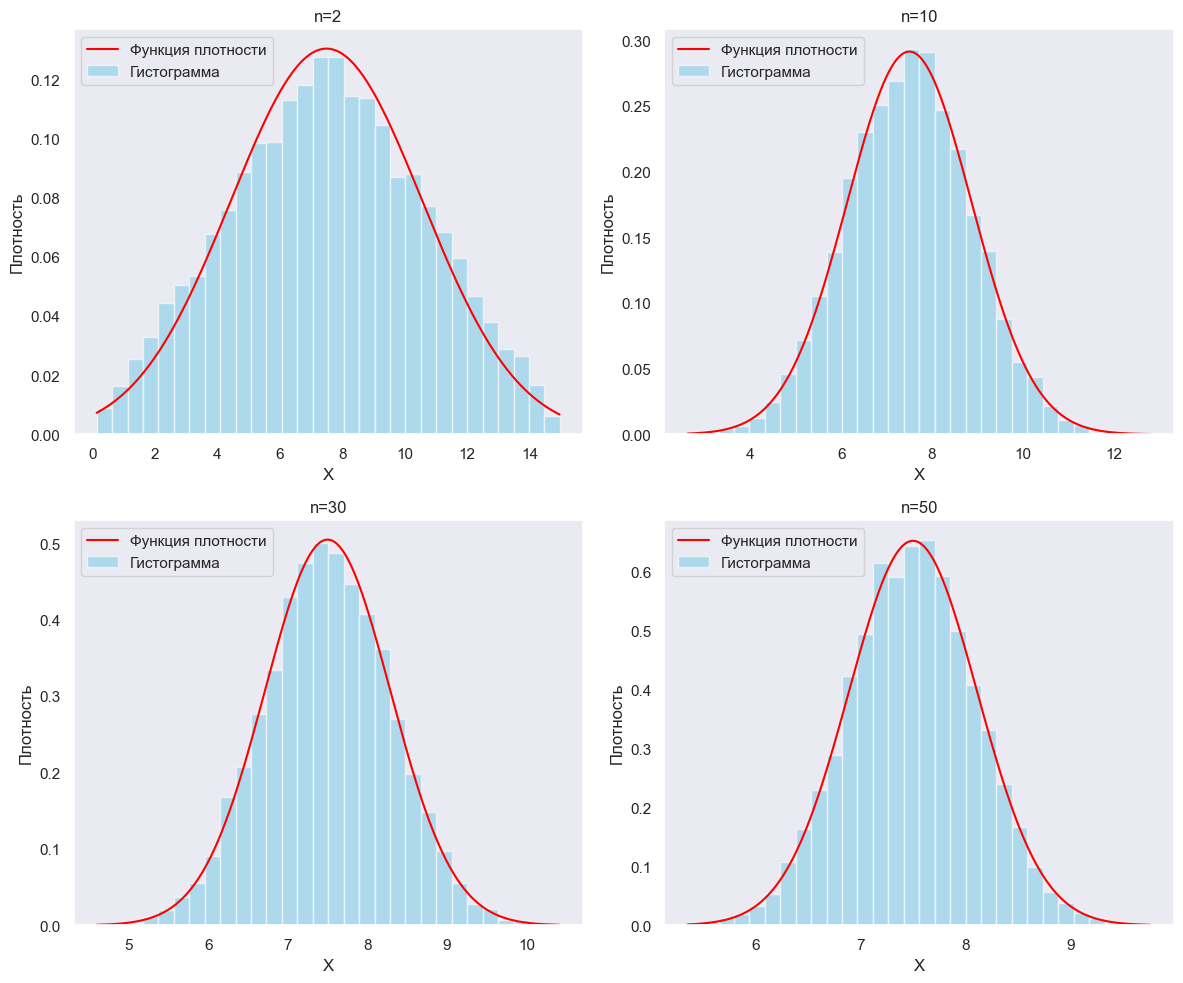

In [127]:

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()  

for idx, n in enumerate(n_values):
    sample_means = sample_mean_n(a, b, n, k)
    

    x_axis = np.arange(min(sample_means), max(sample_means), 0.01)
    
    mu = (a + b) / 2
    variance = (((b - a) ** 2) / 12) / n  
    
    axs[idx].hist(sample_means, bins=30, density=True, alpha=0.6, color='skyblue')
    
    axs[idx].plot(x_axis, stats.norm.pdf(x_axis, mu, np.sqrt(variance)), color='red')
    
    axs[idx].set_title(f'n={n}')
    axs[idx].set_xlabel("X")
    axs[idx].set_ylabel("Плотность")


    axs[idx].legend(["Функция плотности", "Гистограмма"], loc='upper left')

plt.tight_layout()
plt.show()

При исходном равномерном распределении скорость приближения выборочных средних к нормальному очень быстра и неплохо достигается при малом размере выборки.

### Экспоненциальное распределени

In [130]:
lam = 8
# немного переделаем прежнюю функцию
def sample_mean_expon_n(lam, n, k):
    sample_means = []
    for i in range(k):
    #реализация выборки одинаково распределенных n случайных величин с экспон. распределением
        sample_means.append(np.mean(np.random.exponential(1/lam, n)))
    return sample_means

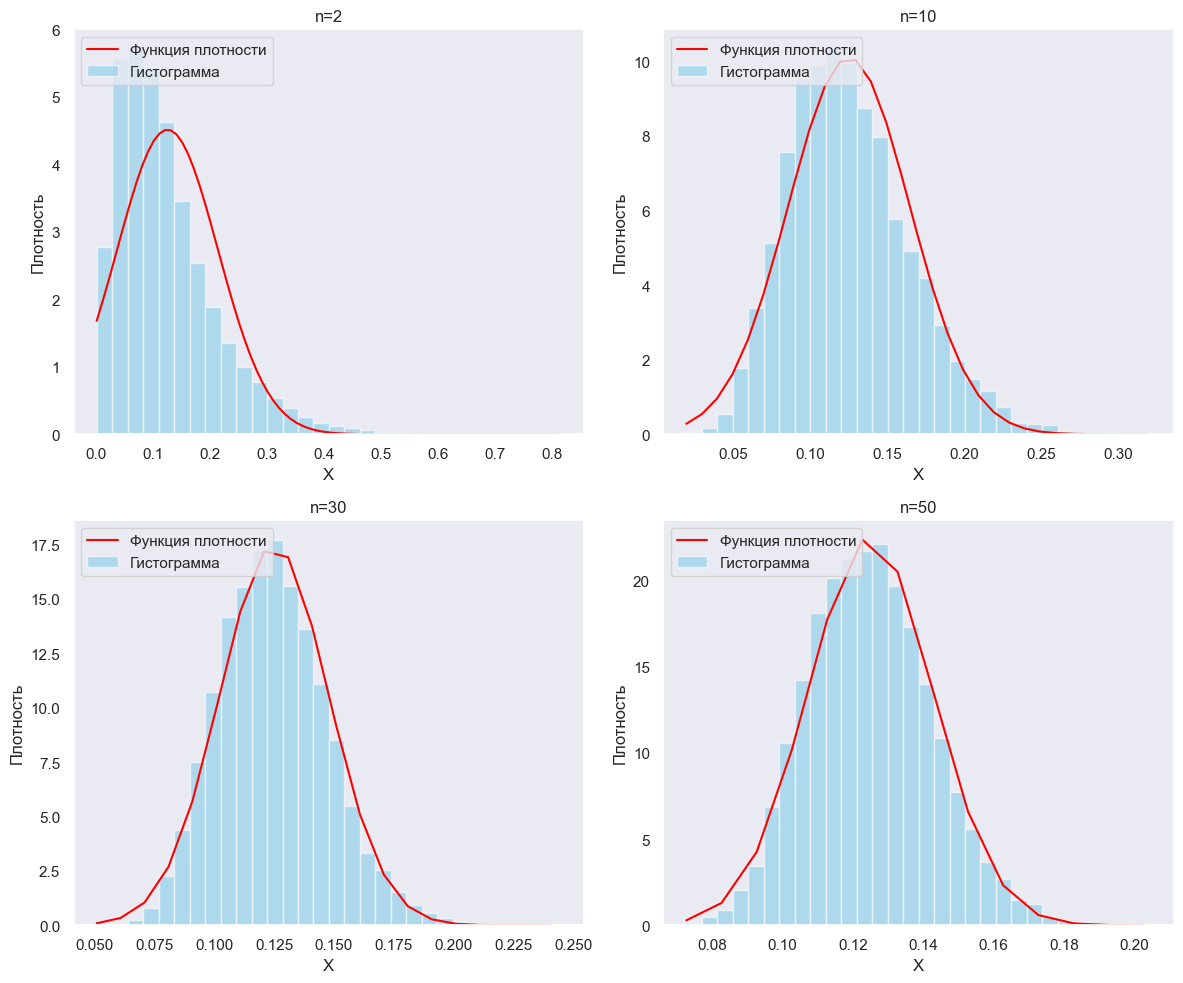

In [131]:

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()  

for idx, n in enumerate(n_values):
    sample_means = sample_mean_expon_n(lam, n, k)
    
    x_axis = np.arange(min(sample_means), max(sample_means), 0.01)
    
    mu = lam**-1
    variance = (lam**-2) / n  
    
    axs[idx].hist(sample_means, bins=30, density=True, alpha=0.6, color='skyblue')
    
    axs[idx].plot(x_axis, stats.norm.pdf(x_axis, mu, np.sqrt(variance)), color='red')
    
    axs[idx].set_title(f'n={n}')
    axs[idx].set_xlabel("X")
    axs[idx].set_ylabel("Плотность")


    axs[idx].legend(["Функция плотности", "Гистограмма"], loc='upper left')

plt.tight_layout()
plt.show()

Распределение выборочных средних наследует от исходного экспоненциального распределения ассиметрию и правый хвост, а скорость приближения к нормальному долгая. Даже при выборке размером в 50 мы не в полной мере удачно достигаем нормального распределения.

### Распределение Пуассона

In [134]:
lam = 8
# немного переделаем прежнюю функцию
def sample_mean_poisson_n(lam, n, k):
    sample_means = []
    for i in range(k):
    #реализация выборки одинаково распределенных n случайных величин с экспон. распределением
        sample_means.append(np.mean(np.random.poisson(lam, n)))
    return sample_means

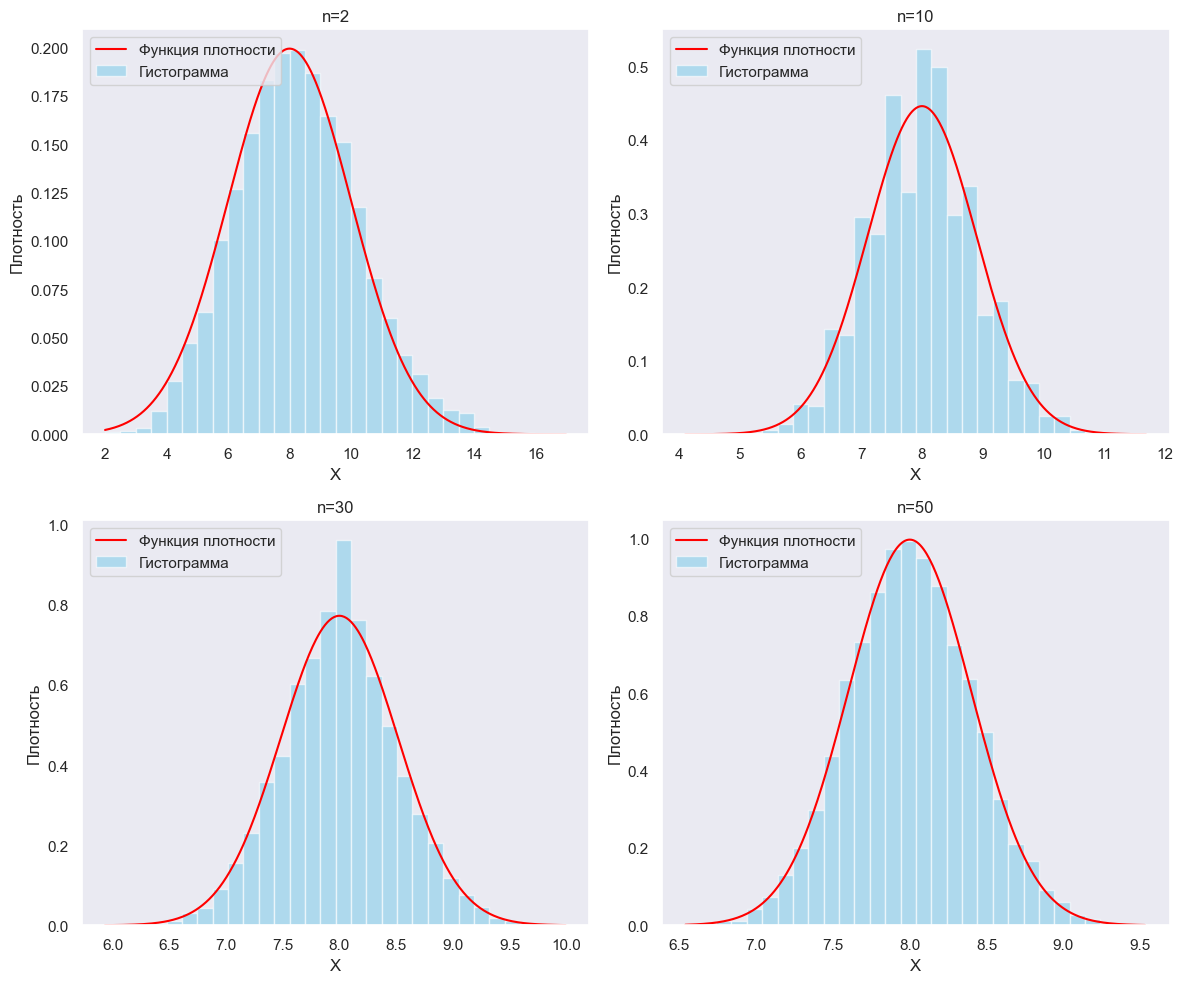

In [135]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()  

for idx, n in enumerate(n_values):
    sample_means = sample_mean_poisson_n(lam, n, k)
    
    x_axis = np.arange(min(sample_means), max(sample_means), 0.01)
    
    mu = lam
    variance = lam / n  
    
    axs[idx].hist(sample_means, bins=30, density=True, alpha=0.6, color='skyblue')
    
    axs[idx].plot(x_axis, stats.norm.pdf(x_axis, mu, np.sqrt(variance)), color='red')
    
    axs[idx].set_title(f'n={n}')
    axs[idx].set_xlabel("X")
    axs[idx].set_ylabel("Плотность")


    axs[idx].legend(["Функция плотности", "Гистограмма"], loc='upper left')

plt.tight_layout()
plt.show()

### Биномиальное распределение

In [138]:
p = 0.4
number_trials = 70
q = 1 - p
# немного переделаем прежнюю функцию
def sample_mean_binom_n(p, n, k):
    sample_means = []
    for i in range(k):
    #реализация выборки одинаково распределенных n случайных величин с экспон. распределением
        sample_means.append(np.mean(np.random.binomial(number_trials, p, n)))
    return sample_means

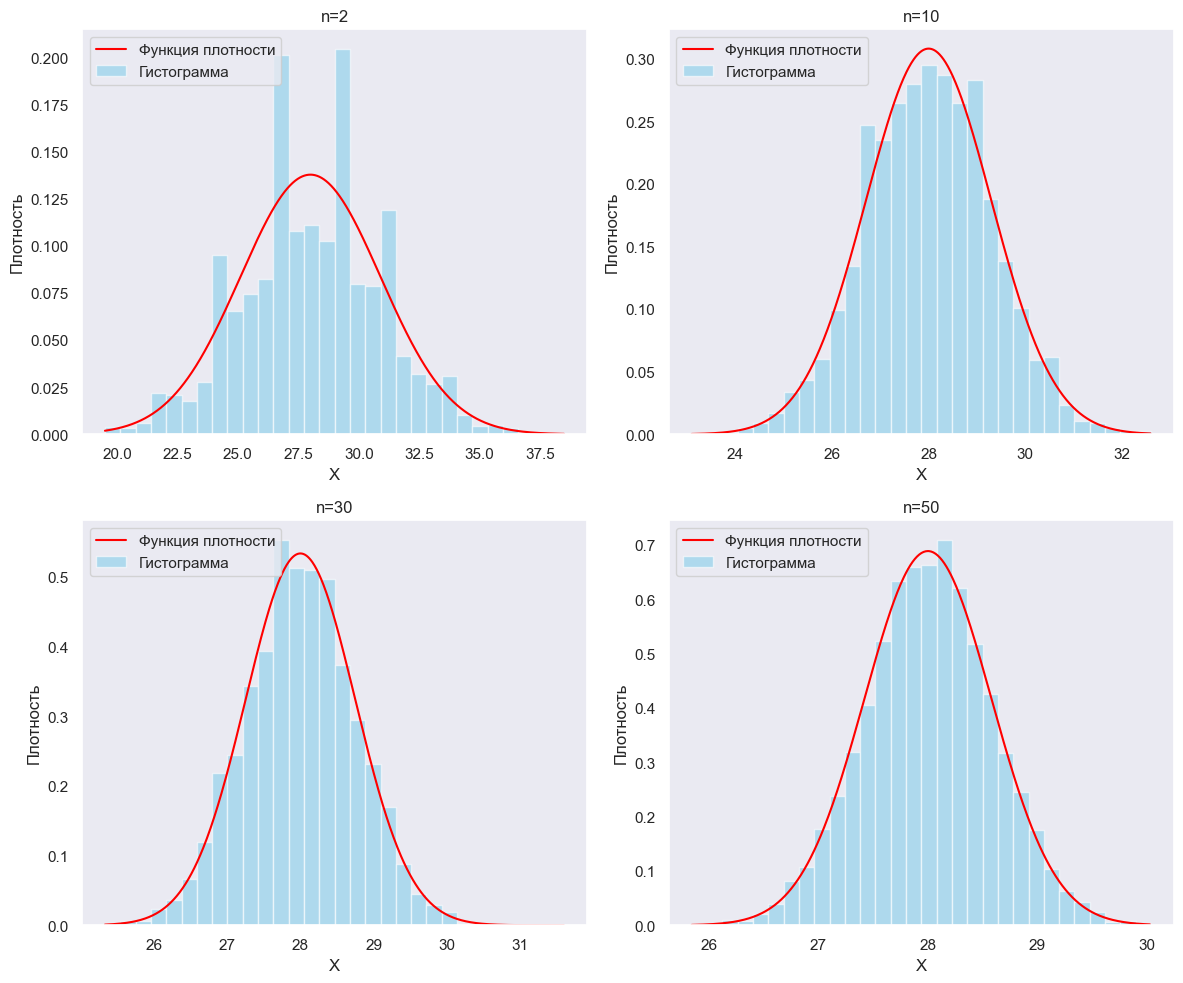

In [139]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()  

for idx, n in enumerate(n_values):
    sample_means = sample_mean_binom_n(p, n, k)
    
    x_axis = np.arange(min(sample_means), max(sample_means), 0.01)
    
    mu = number_trials * p
    variance =  (number_trials * p * q) / n  
    
    axs[idx].hist(sample_means, bins=30, density=True, alpha=0.6, color='skyblue')
    
    axs[idx].plot(x_axis, stats.norm.pdf(x_axis, mu, np.sqrt(variance)), color='red')
    
    axs[idx].set_title(f'n={n}')
    axs[idx].set_xlabel("X")
    axs[idx].set_ylabel("Плотность")


    axs[idx].legend(["Функция плотности", "Гистограмма"], loc='upper left')

plt.tight_layout()
plt.show()

### Распределение Бернулли

Отдельно посмотрим на работу ЦПТ при Bern распределении.

Мы берем n независимых одинаково распределенных бернуллиевских случайны величин, считаем среднее и таким образом получаем распределение новое. Бернуллиевская случайная величина принимает только значения 1 и 0 (при успехе и отсутсвии данного соответственно). Получается, сумма таких величин будет распределена Биномиально, а при работе ЦПТ матожидание будет эквивалентно матожиданию получившейся Бернуллиевской случайной величине

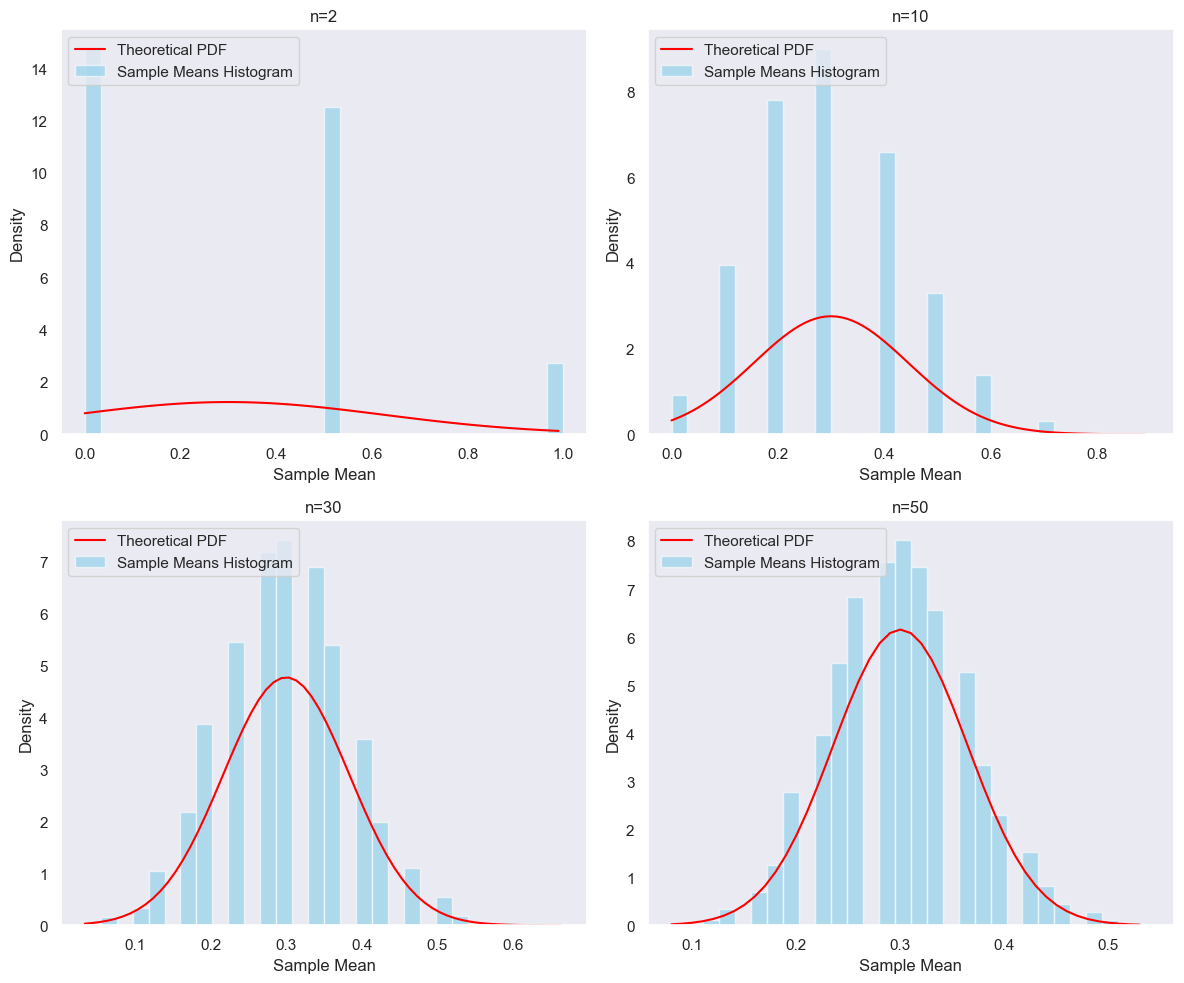

In [142]:
def sample_mean_bern(p, n, k):

    sample_means = []
    for _ in range(k):
        sample = np.random.binomial(1, p, n)  
        sample_means.append(np.mean(sample))  
    return sample_means

p = 0.3  


fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()  

for idx, n in enumerate(n_values):
    sample_means = sample_mean_bern(p, n, k)
    
    x_axis = np.arange(min(sample_means), max(sample_means), 0.01)
    
    mu = p  
    variance = (p * (1 - p)) / n  

    axs[idx].hist(sample_means, bins=30, density=True, alpha=0.6, color='skyblue')
    
    axs[idx].plot(x_axis, stats.norm.pdf(x_axis, mu, np.sqrt(variance)), color='red')
    
    axs[idx].set_title(f'n={n}')
    axs[idx].set_xlabel("Sample Mean")
    axs[idx].set_ylabel("Density")

    axs[idx].legend(["Theoretical PDF", "Sample Means Histogram"], loc='upper left')

plt.tight_layout()
plt.show()

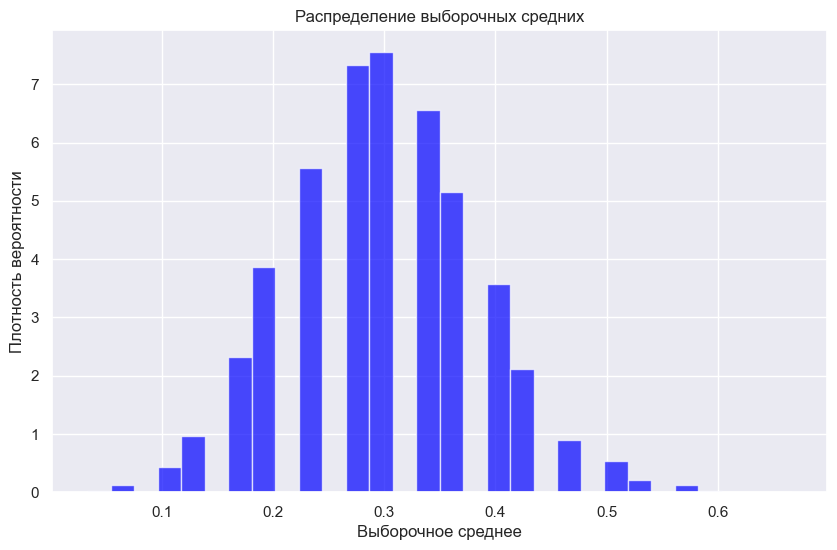

In [143]:
# Устанавливаем параметры
p = 0.3  # Вероятность успеха для распределения Бернулли
n = 30   # Размер выборки
num_samples = 10000  # Количество выборок

# Генерируем выборочные средние
sample_means = []
for _ in range(num_samples):
    sample = np.random.binomial(1, p, n)  # Генерация выборки из n значений
    sample_mean = np.mean(sample)  # Вычисление выборочного среднего
    sample_means.append(sample_mean)

# Преобразуем в массив для удобства
sample_means = np.array(sample_means)

# Визуализируем распределение выборочных средних
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, density=True, alpha=0.7, color='blue')
plt.title('Распределение выборочных средних')
plt.xlabel('Выборочное среднее')
plt.ylabel('Плотность вероятности')
plt.grid(True)
plt.show()

###  Геометрическое распределение

In [145]:
p = 0.4
q = 1-p
# немного переделаем прежнюю функцию
def sample_mean_geometric_n(p, n, k):
    sample_means = []
    for i in range(k):
    #реализация выборки одинаково распределенных n случайных величин с экспон. распределением
        sample_means.append(np.mean(np.random.geometric(p, n)))
    return sample_means

In [146]:
sample_means = sample_mean_geometric_n(p, n, k)

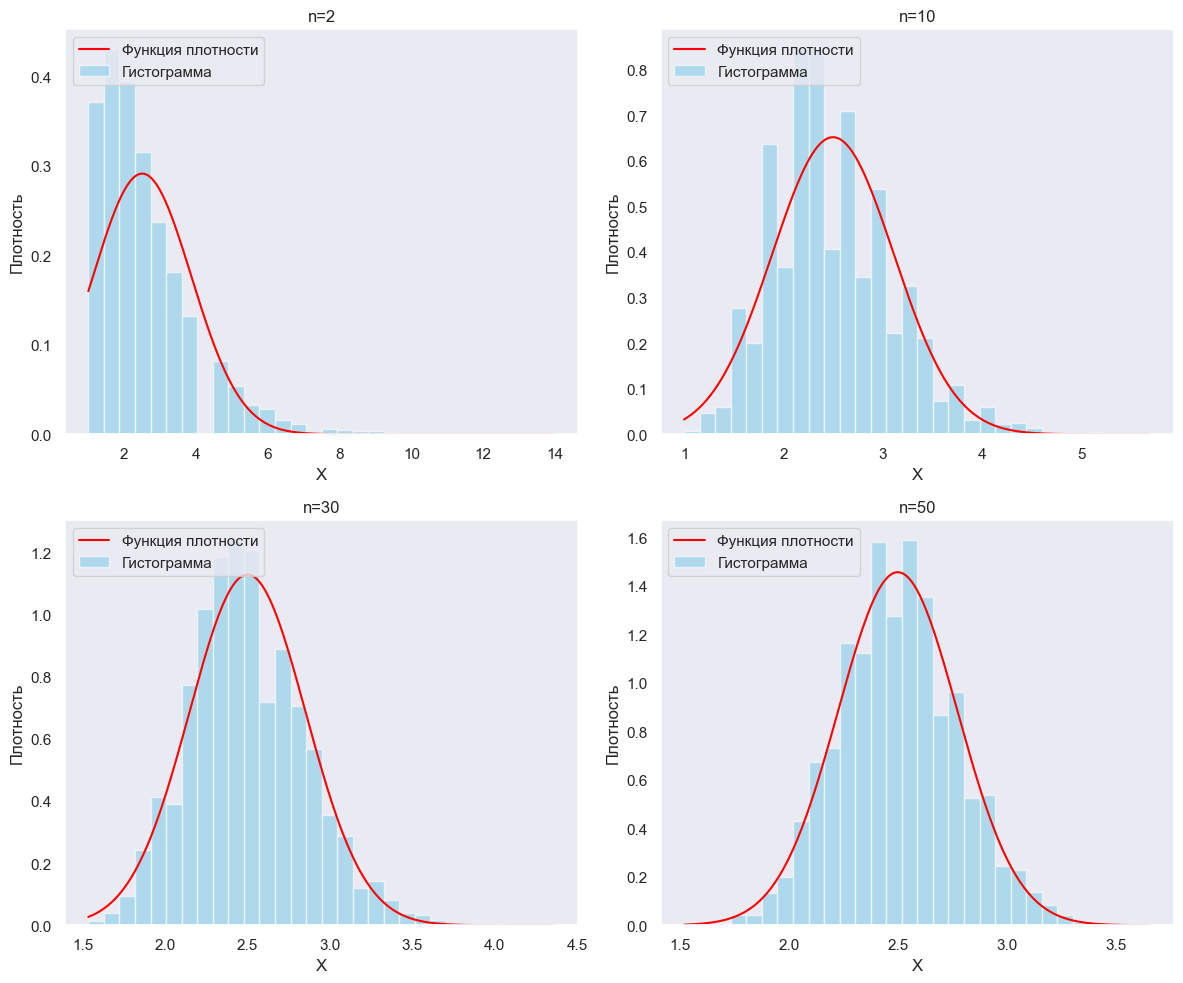

In [147]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()  

for idx, n in enumerate(n_values):
    sample_means = sample_mean_geometric_n(p, n, k)
    
    x_axis = np.arange(min(sample_means), max(sample_means), 0.01)
    
    mu = 1/p
    variance = (p**-2 * q) / n  
    
    axs[idx].hist(sample_means, bins=30, density=True, alpha=0.6, color='skyblue')
    
    axs[idx].plot(x_axis, stats.norm.pdf(x_axis, mu, np.sqrt(variance)), color='red')
    
    axs[idx].set_title(f'n={n}')
    axs[idx].set_xlabel("X")
    axs[idx].set_ylabel("Плотность")


    axs[idx].legend(["Функция плотности", "Гистограмма"], loc='upper left')

plt.tight_layout()
plt.show()

## Доверительный интервал

Доверительный интервал - это числовой отрезок в котором с заданной вероятностью находится значение случайной величины. 

Мы возьмем два распределения - с медленным и быстрым приближением нормального распределения выборочных средних. Затем возьмем по 20 выборок разного размера, для каждой выборки определим среднее и определим доверительный интервал для каждого значения оценки. 

Цель - посмотреть попало ли истинное среднее в доверительный иннтервал выборочного среднего.

### Экспоненциальное распределение

Как мы видели выше, случайная величина с экспон. распределением продолжительно приближается к нормальному по ЦПТ

In [152]:
X_expon = np.random.exponential(scale=1, size=1000)


alpha = 0.05  # уровень значимости 
n_experiments = 20  # кол-во экспериментов
n_values = [5, 10, 20, 50] # размер выборки

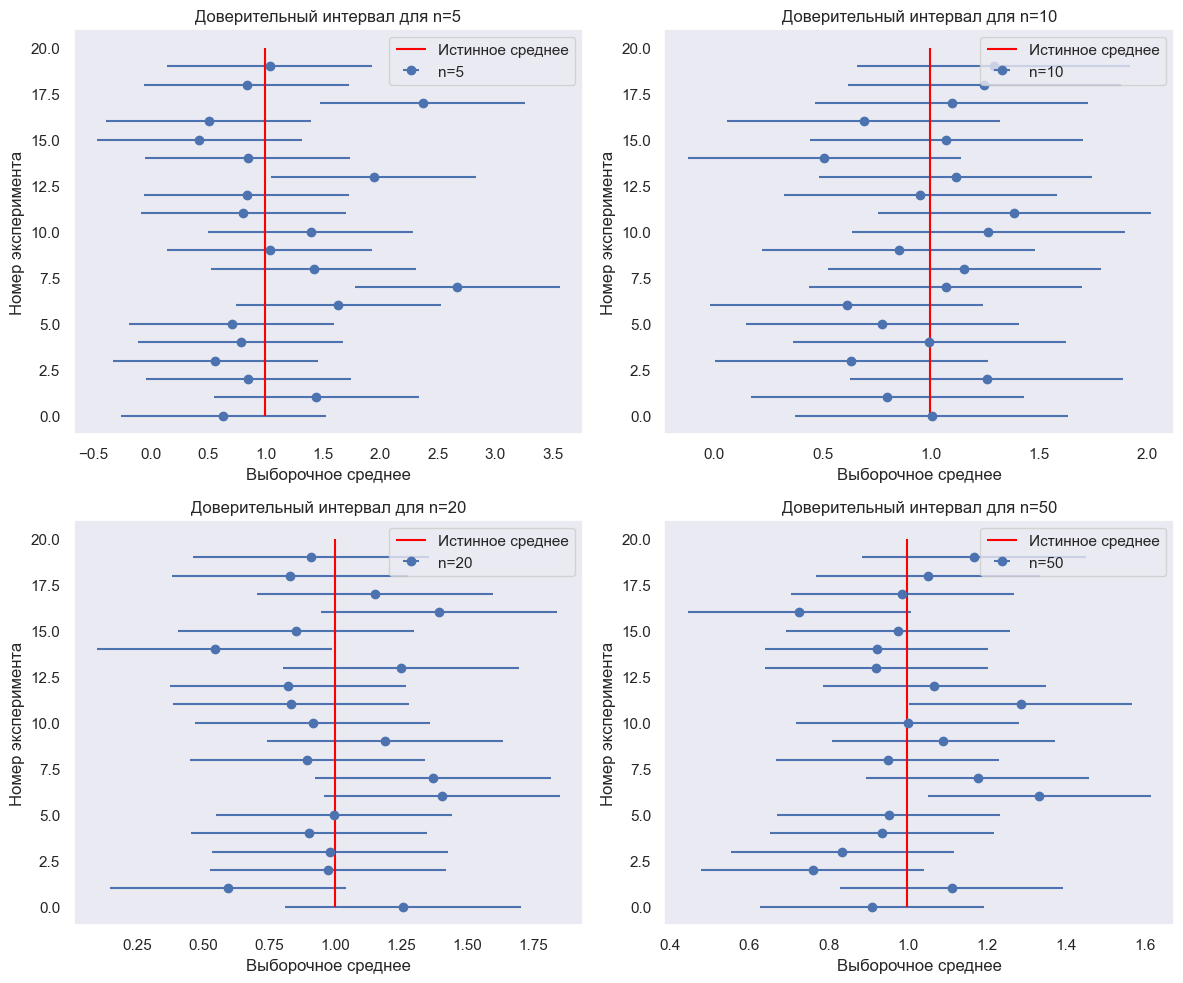

In [153]:

sigma = X_expon.std()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()  

for idx, n in enumerate(n_values):
    intervals = []
    means = []
    
    for i in range(n_experiments):
        sample = np.random.choice(X_expon, size=n)
        sample_mean = sample.mean()
        
        left_side = sample_mean + stats.norm.ppf(q=alpha/2) * sigma / (n**0.5)
        right_side = sample_mean + stats.norm.ppf(q=1 - alpha/2) * sigma / (n**0.5)
        
        means.append(sample_mean)
        intervals.append((left_side, right_side))
    
    axs[idx].errorbar(
        x=means,
        xerr=[(right_side - left_side) / 2 for left_side, right_side in intervals],
        y=np.arange(0, n_experiments, 1),
        fmt='o',
        label=f'n={n}'
    )
    
    axs[idx].vlines(ymin=0, ymax=n_experiments, x=X_expon.mean(), color='red', label='Истинное среднее')
    
    axs[idx].set_title(f'Доверительный интервал для n={n}')
    axs[idx].set_xlabel("Выборочное среднее")
    axs[idx].set_ylabel("Номер эксперимента")
    axs[idx].legend(loc='upper right')

plt.tight_layout()
plt.show()

Обычно один (иногда два) интервала не охватывают истинное срднее, что составляет 5% от 20. Размер выборки играет ключевое значение и сокращает интервал, тем самым минимизируя неопределенность. Стандартное отклонение исходной случайной величины используется в определении ДИ и чем оно выше, тем шире будет ДИ.

Для расчета ДИ выше мы использовали станадртное отклонение генеральной совокупности. На практике оно почти всегда неизвестно, поэтому используют оценку стандартного отклонения. Посмотрим, какие нас будут ждать результаты при использовании т-статистики для расчета ДИ

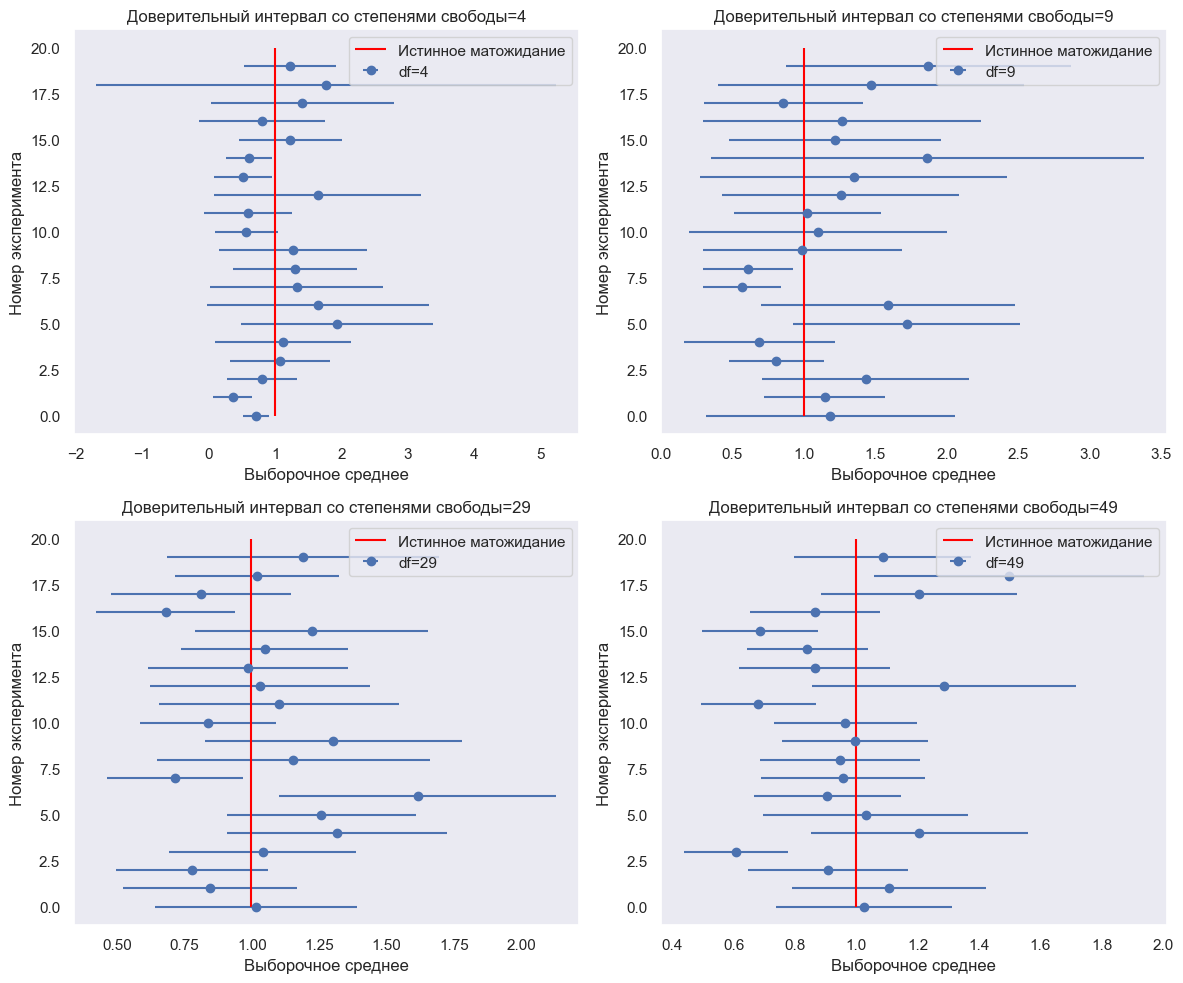

In [251]:
alpha = 0.05  
n_experiments = 20  
n_values = [5, 10, 30, 50]  

sigma = X_expon.std()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()  

for idx, n in enumerate(n_values):
    intervals = []
    means = []
    
    for i in range(n_experiments):
        sample = np.random.choice(X_expon, size=n)
        sample_mean = sample.mean()
        sample_sigma = sample.std()
        
        left_side = sample_mean + stats.t.ppf(q=alpha/2, df=n-1) * sample_sigma / (n**0.5)
        right_side = sample_mean + stats.t.ppf(q=1 - alpha/2, df=n-1) * sample_sigma / (n**0.5)
        
        means.append(sample_mean)
        intervals.append((left_side, right_side))
    
    axs[idx].errorbar(
        x=means,
        xerr=[(right_side - left_side) / 2 for left_side, right_side in intervals],
        y=np.arange(0, n_experiments, 1),
        fmt='o',
        label=f'df={n-1}'
    )
    
    axs[idx].vlines(ymin=0, ymax=n_experiments, x=X_expon.mean(), color='red', label='Истинное матожидание')
    
    axs[idx].set_title(f'Доверительный интервал со степенями свободы={n-1}')
    axs[idx].set_xlabel("Выборочное среднее")
    axs[idx].set_ylabel("Номер эксперимента")
    axs[idx].legend(loc='upper right')

plt.tight_layout()
plt.show()

Итак, при неизвестном стандартном отклонении мы использовали выборочное станадртное отклонение. Выборочное стандартное отклонение - это случайная величина, которая зависит от конкретных значений выборки. Данная неопределенность отражается на построенных доверительных интервалах: доверительные интервалы имеют различные диапозоны, которые становятся более стабильны по мере увеличения размера выборки. Доверительные интервалы могут сильно отличаться и для близких средних значениях, т.к. выборочной дисперсии это не мешает в разы отличаться. 

Примерно 2-4 доверительных интервал у нас не покрывают истинное среднее для каждого у каждой двадцатки экспериментов при разном размере выбокри, что выше установленного уровня доверия в 95%. Это связано с тем, что ЦПТ, которое лежит в основе всех рассуждений, плохо приближает экспоненциальное и иные распределения, сильно отличные от нормального.

### Равномерное распределение

In [157]:
a = 0
b = 15


X_uniform = np.random.uniform(a, b, size=100000)

In [160]:
sigma_uniform = (b-a) / np.sqrt(12)

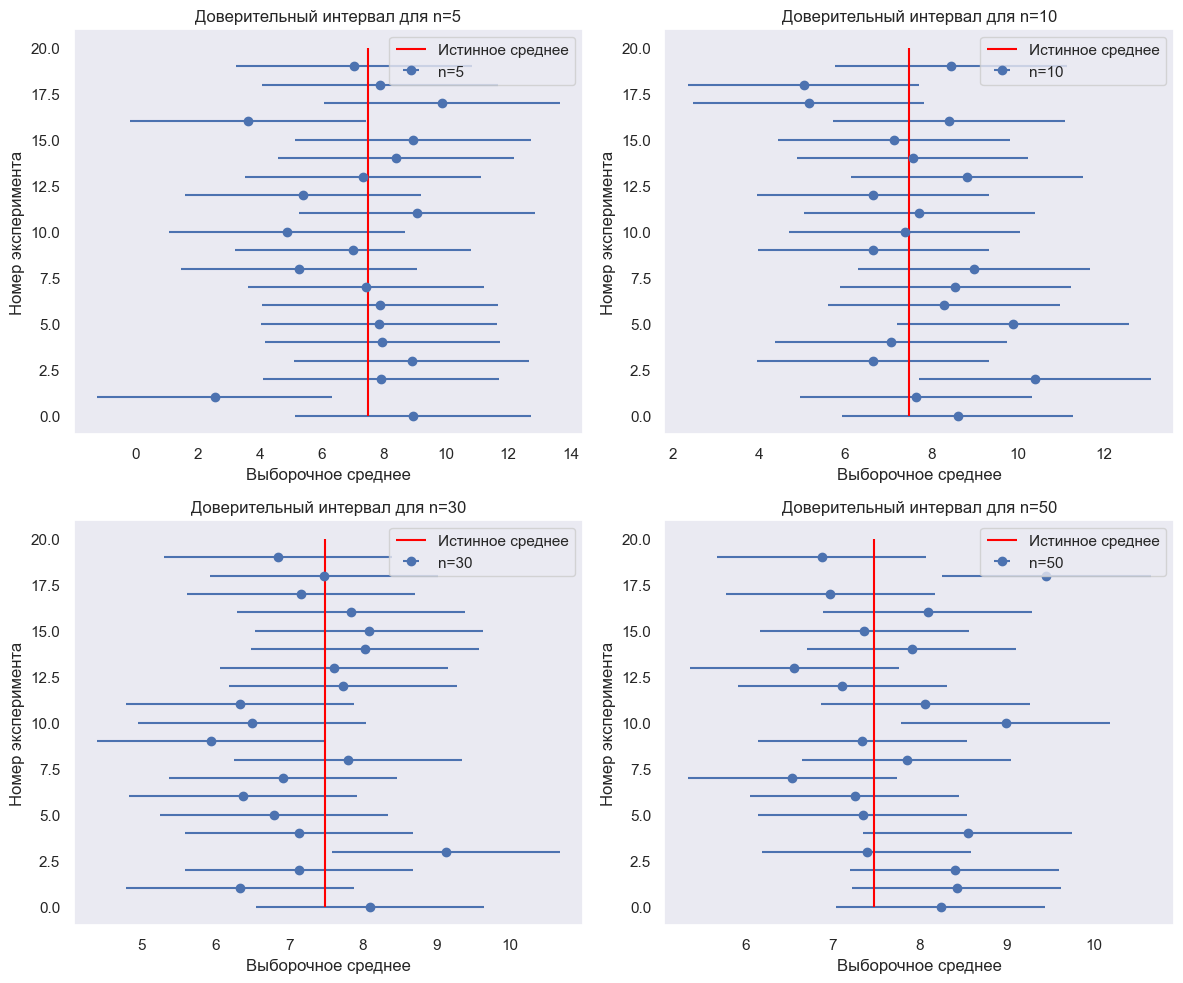

In [255]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()  

for idx, n in enumerate(n_values):
    intervals = []
    means = []
    
    for i in range(n_experiments):
        sample = np.random.choice(X_uniform, size=n)
        sample_mean = sample.mean()
        
        left_side = sample_mean + stats.norm.ppf(q=alpha/2) * sigma_uniform / (n**0.5)
        right_side = sample_mean + stats.norm.ppf(q=1 - alpha/2) * sigma_uniform / (n**0.5)
        
        means.append(sample_mean)
        intervals.append((left_side, right_side))
    
    axs[idx].errorbar(
        x=means,
        xerr=[(right_side - left_side) / 2 for left_side, right_side in intervals],
        y=np.arange(0, n_experiments, 1),
        fmt='o',
        label=f'n={n}'
    )
    
    axs[idx].vlines(ymin=0, ymax=n_experiments, x=X_uniform.mean(), color='red', label='Истинное среднее')
    
    axs[idx].set_title(f'Доверительный интервал для n={n}')
    axs[idx].set_xlabel("Выборочное среднее")
    axs[idx].set_ylabel("Номер эксперимента")
    axs[idx].legend(loc='upper right')

plt.tight_layout()
plt.show()

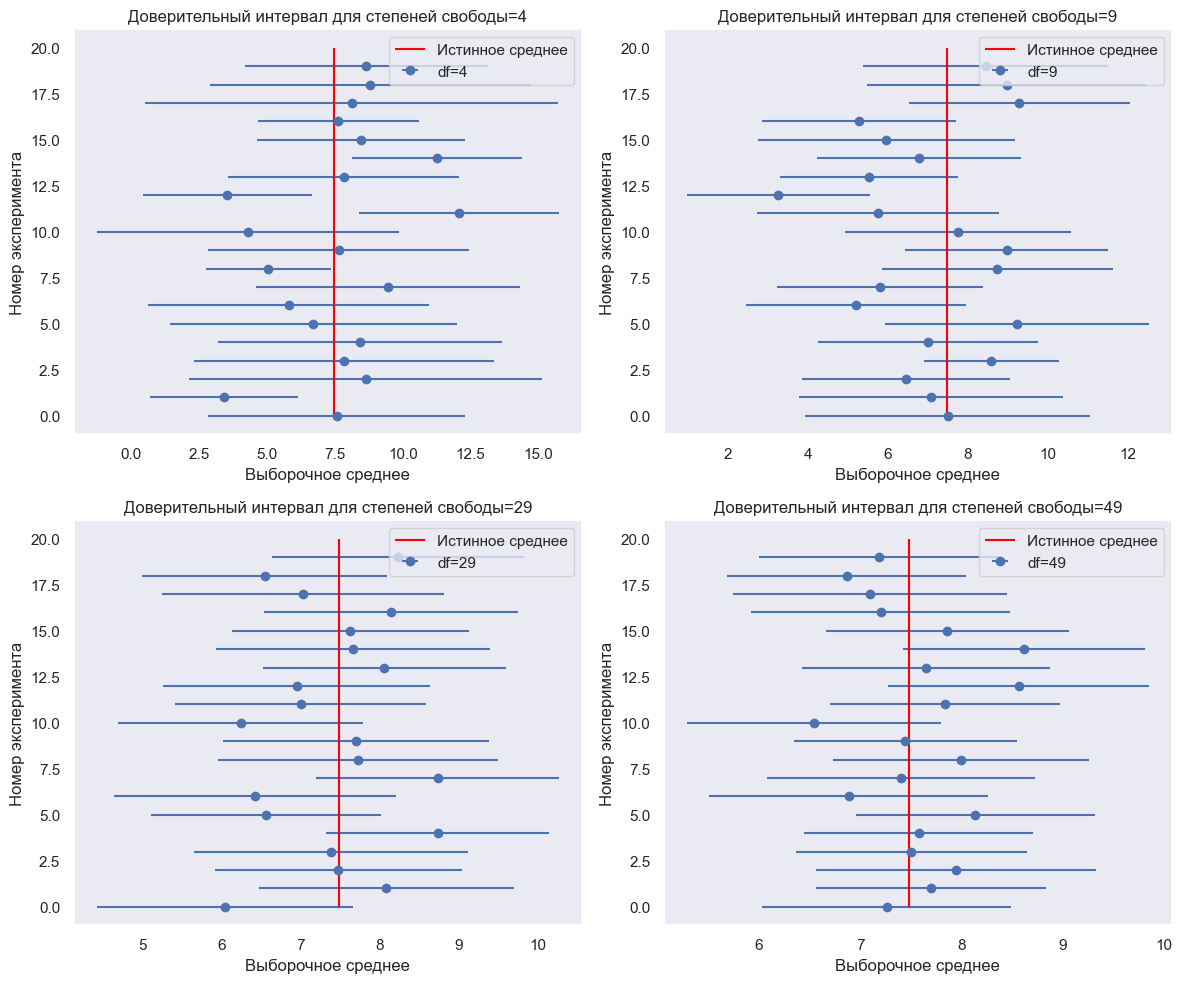

In [257]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()  

for idx, n in enumerate(n_values):
    intervals = []
    means = []
    
    for i in range(n_experiments):
        sample = np.random.choice(X_uniform, size=n)
        sample_mean = sample.mean()
        sample_sigma = sample.std()
        
        left_side = sample_mean + stats.t.ppf(q=alpha/2, df=n-1) * sample_sigma / (n**0.5)
        right_side = sample_mean + stats.t.ppf(q=1 - alpha/2, df=n-1) * sample_sigma / (n**0.5)
        
        means.append(sample_mean)
        intervals.append((left_side, right_side))
    
    axs[idx].errorbar(
        x=means,
        xerr=[(right_side - left_side) / 2 for left_side, right_side in intervals],
        y=np.arange(0, n_experiments, 1),
        fmt='o',
        label=f'df={n-1}'
    )
    
    axs[idx].vlines(ymin=0, ymax=n_experiments, x=X_uniform.mean(), color='red', label='Истинное среднее')
    
    axs[idx].set_title(f'Доверительный интервал для степеней свободы={n-1}')
    axs[idx].set_xlabel("Выборочное среднее")
    axs[idx].set_ylabel("Номер эксперимента")
    axs[idx].legend(loc='upper right')

plt.tight_layout()
plt.show()